## House Price Prediction using Linear, Ridge and Lasso Regression

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## Model Approach

 Build a regression model using Advance regression methods like Ridge and Lasso regression to predict the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Exploratory data analysis
- Feature Selection and Data Modelling
- Splitting the data into train and test
- Performing appropriate regression techniques
- Checking the fit of the model along with Multicolinearity etc.
- Perform Ridge and Lasso to have fundamental feature selection to create a generalised model

## Model Objective:

- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house.
- Also, determine the optimal value of lambda for ridge and lasso regression.

## 1. Including relevant libraries

In [1]:
#Importing libraries

#Basic libraries
import pandas as pd
import numpy as np
import os
# handling warnings
import warnings
warnings.filterwarnings('ignore')

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data modelling libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm  
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn import metrics
#Statistics
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_rows', 500)

## 2. Reading Data


In [2]:
#Read the data and creating the dataframe
df=pd.read_csv("train.csv")

In [3]:
# reading fe records
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
# inspect the first five rows of data
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
# check the no of rows and columns
df.shape

(1460, 81)

In [6]:
# total columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# information about complete dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# describing the data
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

It is clearly visible from dataframe information that some of the data is null.

## 3. Data Cleaning

### 3.1 Handling null values

In [9]:
# Check if any null values are present in the data
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin


### 3.1.2 Finding and removing/replacing null values

In [10]:
# find out percentage of null values in data
round(df.isnull().sum()/len(df.index) * 100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

**From above it is quite evident that Pool Quality , MiscFeature , Fence and Alley have very high percentage of null values . Hence removing these.**
**We can remove Id column as it is of no use**

In [11]:
# remving almost null coulumns. Id
df.drop(['Alley','PoolQC','MiscFeature', 'Fence', 'Id'],axis=1,inplace = True)

df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 76 columns]

Now we are left with 76 columns.

In [12]:
# count the number of null values present in the data

round(df.isnull().sum()/len(df.index)*100,2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinS

 **We still have a few null columns . It is important  to check them individually and see if we can replace some values .**

In [13]:
#Checking the no of unique values in each column
df.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBa

In [14]:
# check null values in FireplaceQu
df['FireplaceQu'].value_counts()/len(df['FireplaceQu'])*100

Gd    26.027397
TA    21.438356
Fa     2.260274
Ex     1.643836
Po     1.369863
Name: FireplaceQu, dtype: float64

In [15]:
# check null values in MasVnrType
df['MasVnrType'].value_counts()/len(df['MasVnrType'])*100

None       59.178082
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64

In [16]:
# check null values in MasVnrType
df['LotFrontage'].value_counts()/len(df['LotFrontage'])*100

60.0     9.794521
70.0     4.794521
80.0     4.726027
50.0     3.904110
75.0     3.630137
65.0     3.013699
85.0     2.739726
78.0     1.712329
21.0     1.575342
90.0     1.575342
68.0     1.301370
64.0     1.301370
24.0     1.301370
73.0     1.232877
55.0     1.164384
63.0     1.164384
79.0     1.164384
72.0     1.164384
100.0    1.095890
66.0     1.027397
74.0     1.027397
51.0     1.027397
52.0     0.958904
59.0     0.890411
82.0     0.821918
71.0     0.821918
67.0     0.821918
43.0     0.821918
40.0     0.821918
57.0     0.821918
76.0     0.753425
69.0     0.753425
92.0     0.684932
34.0     0.684932
53.0     0.684932
86.0     0.684932
88.0     0.684932
84.0     0.616438
35.0     0.616438
62.0     0.616438
44.0     0.616438
77.0     0.616438
93.0     0.547945
98.0     0.547945
96.0     0.547945
61.0     0.547945
95.0     0.479452
58.0     0.479452
120.0    0.479452
107.0    0.479452
94.0     0.410959
81.0     0.410959
36.0     0.410959
30.0     0.410959
48.0     0.410959
91.0     0

In [17]:
df['GarageCond'].value_counts()/len(df['GarageCond'])*100

TA    90.821918
Fa     2.397260
Gd     0.616438
Po     0.479452
Ex     0.136986
Name: GarageCond, dtype: float64

In [18]:
df['GarageType'].value_counts()/len(df['GarageType'])*100

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64

In [19]:
df['GarageQual'].value_counts()/len(df['GarageQual'])*100

TA    89.794521
Fa     3.287671
Gd     0.958904
Ex     0.205479
Po     0.205479
Name: GarageQual, dtype: float64

In [20]:
df['GarageFinish'].value_counts()/len(df['GarageFinish'])*100

Unf    41.438356
RFn    28.904110
Fin    24.109589
Name: GarageFinish, dtype: float64

In [21]:
df['GarageYrBlt'].value_counts()/len(df['GarageYrBlt'])*100

2005.0    4.452055
2006.0    4.041096
2004.0    3.630137
2003.0    3.424658
2007.0    3.356164
1977.0    2.397260
1998.0    2.123288
1999.0    2.054795
1976.0    1.986301
2008.0    1.986301
2000.0    1.849315
1968.0    1.780822
2002.0    1.780822
1950.0    1.643836
1993.0    1.506849
1958.0    1.438356
1966.0    1.438356
2009.0    1.438356
1962.0    1.438356
1965.0    1.438356
1970.0    1.369863
1996.0    1.369863
1957.0    1.369863
2001.0    1.369863
1978.0    1.301370
1954.0    1.301370
1960.0    1.301370
1997.0    1.301370
1974.0    1.232877
1964.0    1.232877
1994.0    1.232877
1995.0    1.232877
1959.0    1.164384
1956.0    1.095890
1963.0    1.095890
1990.0    1.095890
1980.0    1.027397
1979.0    1.027397
1969.0    1.027397
1967.0    1.027397
1973.0    0.958904
1988.0    0.958904
1920.0    0.958904
1972.0    0.958904
1940.0    0.958904
1992.0    0.890411
1961.0    0.890411
1971.0    0.890411
1955.0    0.890411
1953.0    0.821918
1948.0    0.753425
1987.0    0.753425
1925.0    0.

**Masonry veneer type has 60 percent null values. FireplaceQu has 47 percent null values. These can be removed.**
**GarageCond , GarageQual  have almost the same data throughout. Since the contribution by them in saleprice is less , they can be removed**

In [22]:
# removing unecessary columns
df.drop(['GarageQual','GarageCond','MasVnrType', 'FireplaceQu'],axis=1,inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [24]:
# Checking for the percentage of Null values

missing_df=pd.DataFrame((round(100*(df.isnull().sum()/len(df.index)), 2)), columns=['missing'])
missing_df.sort_values(by=['missing'], ascending=False).head(20)

missing
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtQual         2.53
BsmtCond         2.53
MasVnrArea       0.55
Electrical       0.07
HalfBath         0.00
TotRmsAbvGrd     0.00
FullBath         0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00
BedroomAbvGr     0.00
KitchenAbvGr     0.00
GrLivArea        0.00
LowQualFinSF     0.00

**Handling columns with numerical values**

In [25]:
# Treating the NaN Values
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['Electrical'] = df['Electrical'].fillna("Other")

In [26]:
# Dropping the LotFontgage columns as it have more Null values
df.drop("LotFrontage",axis = 1, inplace=True)

**Handling categorical columns with null values**

In [27]:
df['BsmtFinType1'].head()

0    GLQ
1    ALQ
2    GLQ
3    ALQ
4    GLQ
Name: BsmtFinType1, dtype: object

In [28]:
df['BsmtFinType1'].value_counts()/len(df['BsmtFinType1'])*100

Unf    29.452055
GLQ    28.630137
ALQ    15.068493
BLQ    10.136986
Rec     9.109589
LwQ     5.068493
Name: BsmtFinType1, dtype: float64

In [29]:
df['BsmtExposure'].value_counts()/len(df['BsmtExposure'])*100

No    65.273973
Av    15.136986
Gd     9.178082
Mn     7.808219
Name: BsmtExposure, dtype: float64

In [30]:
# Imputing the Nan Values with 'No Basement_data'
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    df[col] = df[col].fillna('No_Basement')

In [31]:
#Imputing the NaN values with 'no garage' 
for col in ('GarageType', 'GarageFinish'):
    df[col] = df[col].fillna('No_Garage')

In [32]:
df['BsmtExposure'].value_counts()/len(df['BsmtExposure'])*100

No             65.273973
Av             15.136986
Gd              9.178082
Mn              7.808219
No_Basement     2.602740
Name: BsmtExposure, dtype: float64

In [33]:
# info of remenant housing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [34]:
#checking for any null values
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces  

### 3.2 Remove duplicate/ non-variant data

In [35]:
# check if any duplicates exist in the data
duplicate_df = df[df.duplicated()]
duplicate_df

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 71 columns]

**No duplicates exist in the data**

### 3.3 Check for data that has less than 2-3 unique values

In [36]:
# function to check all non-variant data which is same for most records . Such columns do not contribute to any variance 
def findNonVariantColumns():
    columnList = []   
    for col in (df):
        if(df[col].value_counts().max() >= 1460*90/100):
            columnList.append(col)
      # Remove the columns with skewed data
    return columnList
   

In [37]:
# find and print all the column list
repeatedColList = findNonVariantColumns()
print(repeatedColList)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [38]:
#let visually verify the same
df['Street'].value_counts()/len(df['Street'])*100

Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64

In [39]:
#let visually verify the same
df['Heating'].value_counts()/len(df['Heating'])*100

GasA     97.808219
GasW      1.232877
Grav      0.479452
Wall      0.273973
OthW      0.136986
Floor     0.068493
Name: Heating, dtype: float64

In [40]:
#let visually verify the same
df['CentralAir'].value_counts()/len(df['CentralAir'])*100

Y    93.493151
N     6.506849
Name: CentralAir, dtype: float64

In [41]:
#let visually verify the same
df['Electrical'].value_counts()/len(df['Electrical'])*100

SBrkr    91.369863
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Other     0.068493
Name: Electrical, dtype: float64

**It is clearly evident the above list actually has almost 90% of data same. Since it shows no variance it can be removed in prediction of sale price.**

In [42]:
df.drop(repeatedColList, inplace=True, axis=1)
df.head()

MSSubClass MSZoning  LotArea LotShape LandContour LotConfig Neighborhood  \
0          60       RL     8450      Reg         Lvl    Inside      CollgCr   
1          20       RL     9600      Reg         Lvl       FR2      Veenker   
2          60       RL    11250      IR1         Lvl    Inside      CollgCr   
3          70       RL     9550      IR1         Lvl    Corner      Crawfor   
4          60       RL    14260      IR1         Lvl       FR2      NoRidge   

  Condition1 BldgType HouseStyle  ...  GarageCars  GarageArea  WoodDeckSF  \
0       Norm     1Fam     2Story  ...           2         548           0   
1      Feedr     1Fam     1Story  ...           2         460         298   
2       Norm     1Fam     2Story  ...           2         608           0   
3       Norm     1Fam     2Story  ...           3         642           0   
4       Norm     1Fam     2Story  ...           3         836         192   

   OpenPorchSF EnclosedPorch MoSold YrSold  SaleType SaleCondition SalePrice  
0           61             0      2   2008        WD        Normal    208500  
1            0             0      5   2007        WD        Normal    181500  
2           42             0      9   2008        WD        Normal    223500  
3           35           272      2   2006        WD       Abnorml    140000  
4           84             0     12   2008        WD        Normal    250000  

[5 rows x 54 columns]

## 4. Exploratory Data Analysis (EDA)

### 4.1 Univariate and Bivariate analysis

**Lets analyse the salesprices first**

<Axes: xlabel='SalePrice', ylabel='Density'>

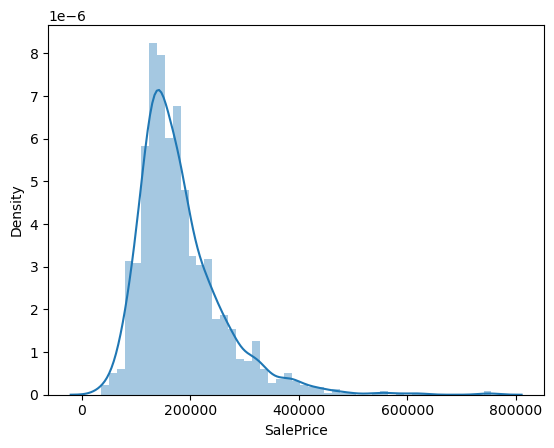

In [43]:
sns.distplot(df['SalePrice'])

**The salesprices are concentrated towards 100000 and 400000 as evident from the density plot.**

<Axes: xlabel='SalePrice', ylabel='Density'>

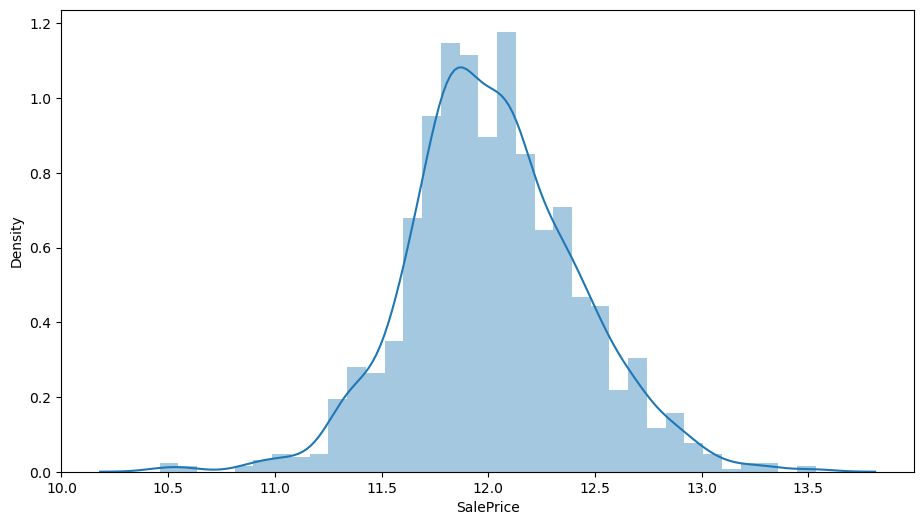

In [44]:
#since the data is skewed and does not follow gaussian curve
plt.figure(figsize=(11,6))
sns.distplot(np.log(df["SalePrice"]))

<Axes: xlabel='SalePrice'>

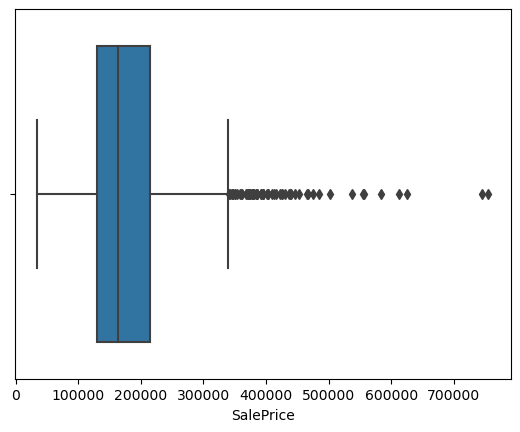

In [45]:
# if we compare it with the total outliers
sns.boxplot(x='SalePrice', data=df)

**As we can see there are some outliers in above graph.**

In [46]:
# go through data description once again
df.describe()

MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     56.897260   10516.828082     6.099315     5.575342  1971.267808   
std      42.300571    9981.264932     1.382997     1.112799    30.202904   
min      20.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      20.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      50.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      70.000000   11601.500000     7.000000     6.000000  2000.000000   
max     190.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   103.117123   443.639726    46.549315   567.240411  ...   
std       20.645407   180.731373   456.098091   161.319273   441.866955  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1967.000000     0.000000     0.000000     0.000000   223.000000  ...   
50%     1994.000000     0.000000   383.500000     0.000000   477.500000  ...   
75%     2004.000000   164.250000   712.250000     0.000000   808.000000  ...   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  ...   

        Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.613014  1868.739726     1.767123   472.980137    94.244521   
std       0.644666   453.697295     0.747315   213.804841   125.338794   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000  1958.000000     1.000000   334.500000     0.000000   
50%       1.000000  1977.000000     2.000000   480.000000     0.000000   
75%       1.000000  2001.000000     2.000000   576.000000   168.000000   
max       3.000000  2010.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch       MoSold       YrSold      SalePrice  
count  1460.000000    1460.000000  1460.000000  1460.000000    1460.000000  
mean     46.660274      21.954110     6.321918  2007.815753  180921.195890  
std      66.256028      61.119149     2.703626     1.328095   79442.502883  
min       0.000000       0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000       0.000000     5.000000  2007.000000  129975.000000  
50%      25.000000       0.000000     6.000000  2008.000000  163000.000000  
75%      68.000000       0.000000     8.000000  2009.000000  214000.000000  
max     547.000000     552.000000    12.000000  2010.000000  755000.000000  

[8 rows x 29 columns]

**We can  see there are numerical as well as categorical variables**

#### Dividing numerical and categorical data

**Univariate analysis of categorical cols**

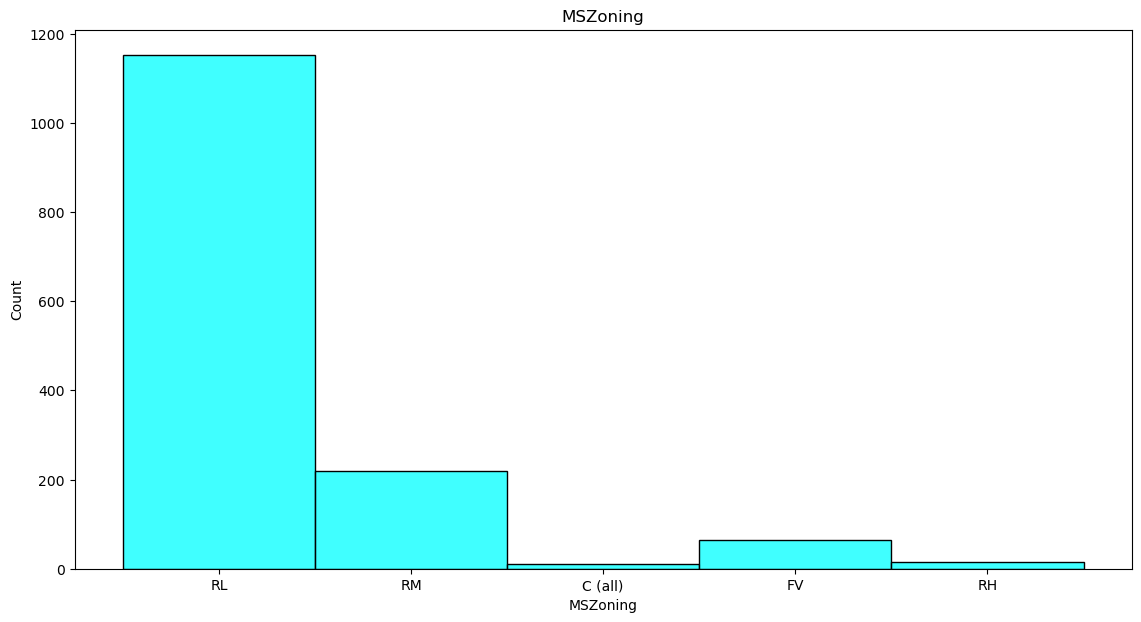

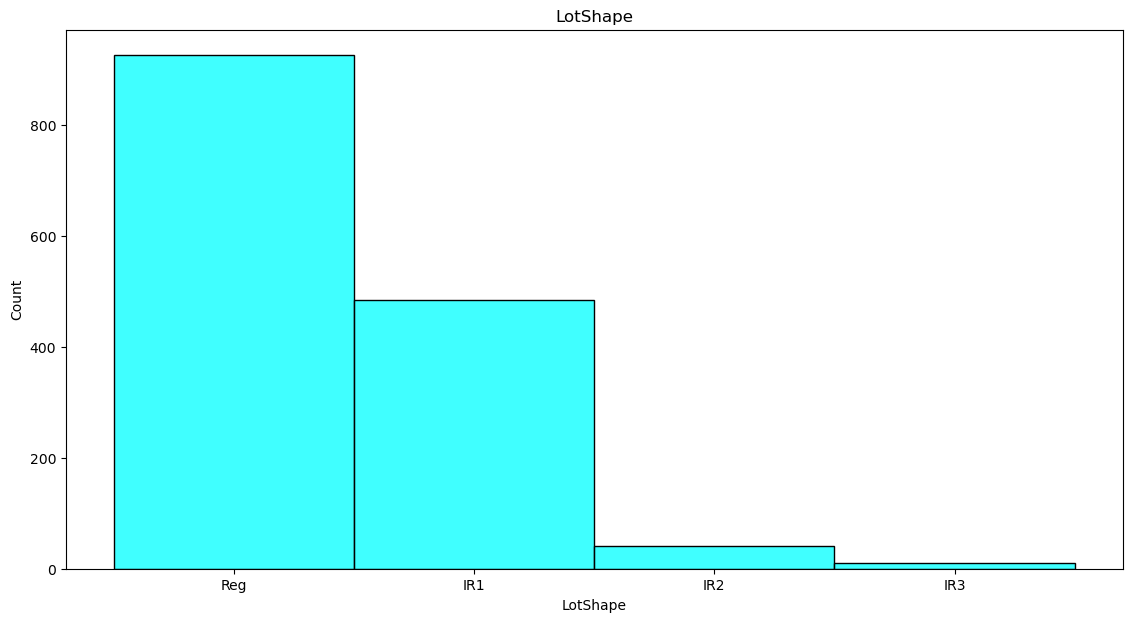

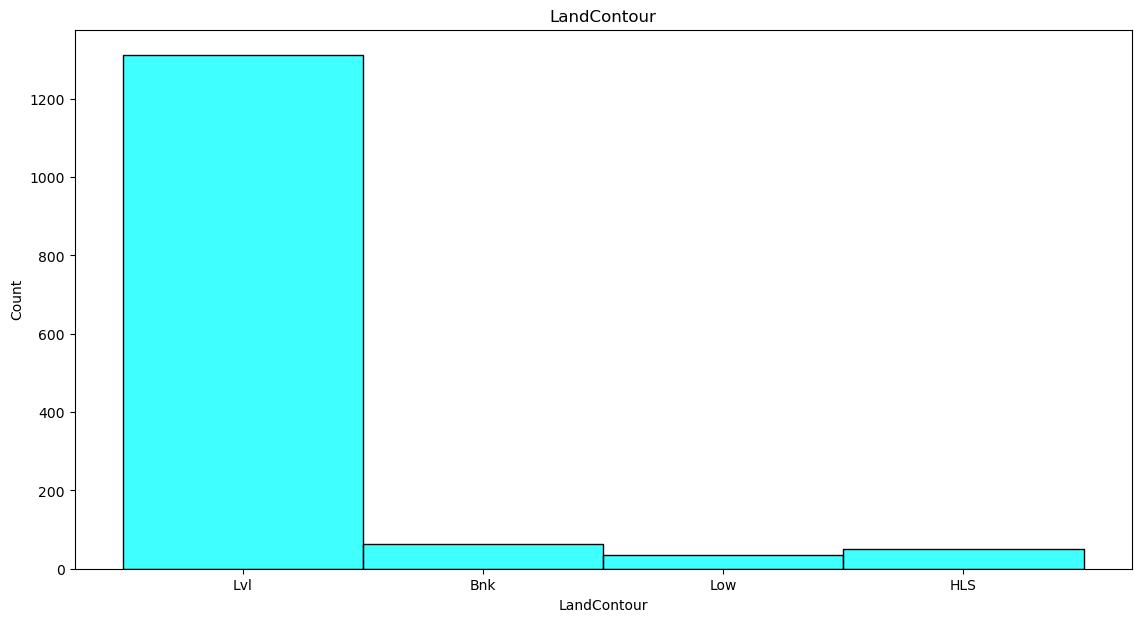

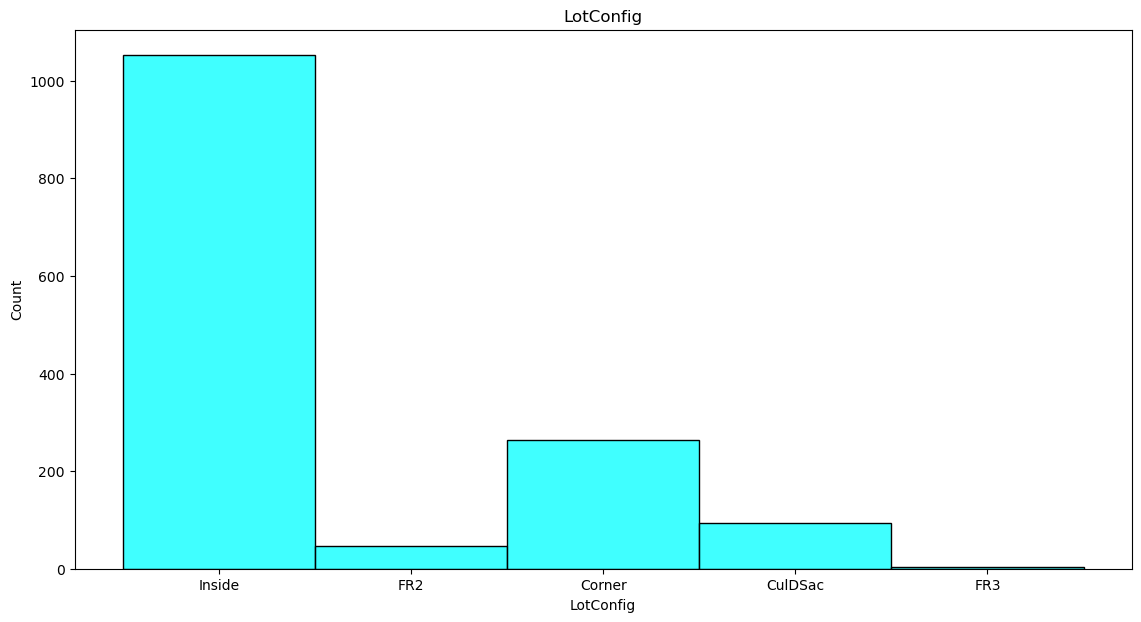

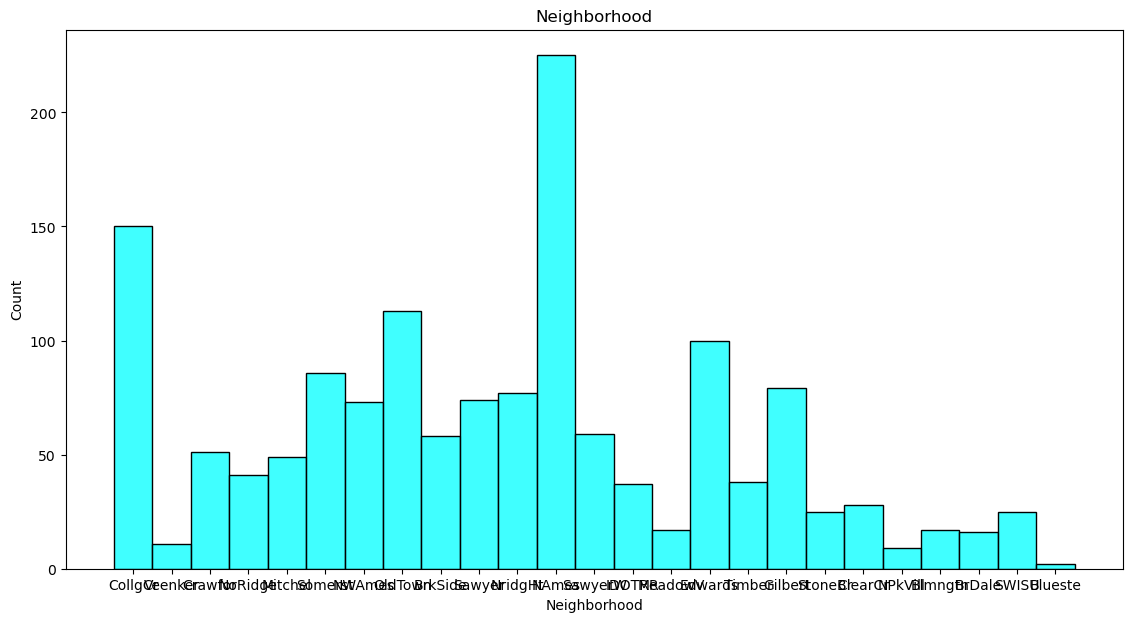

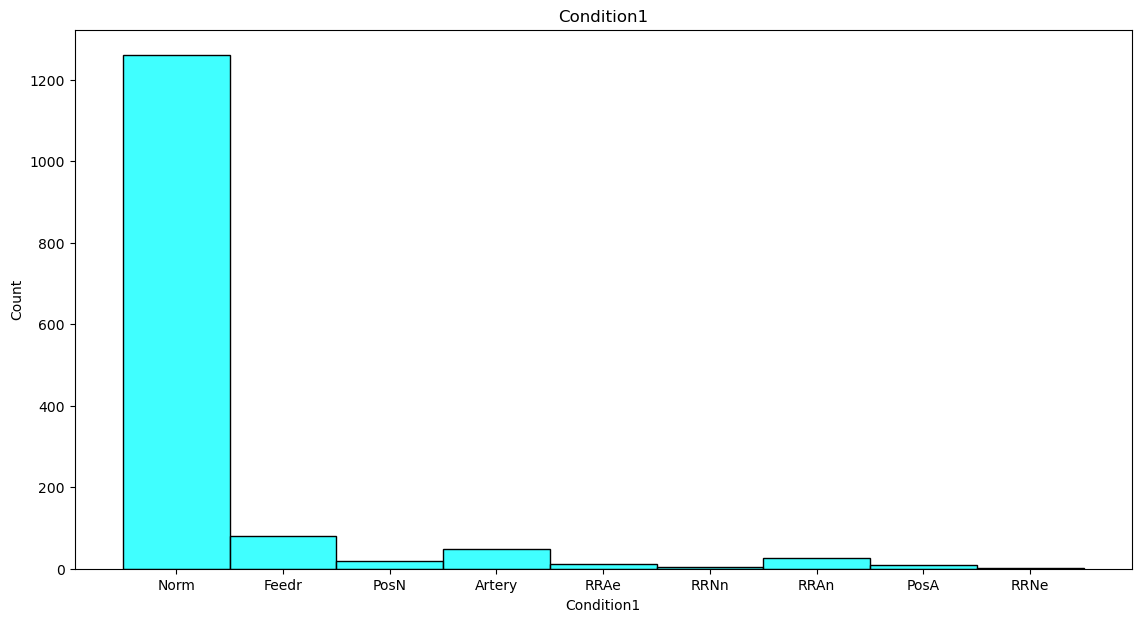

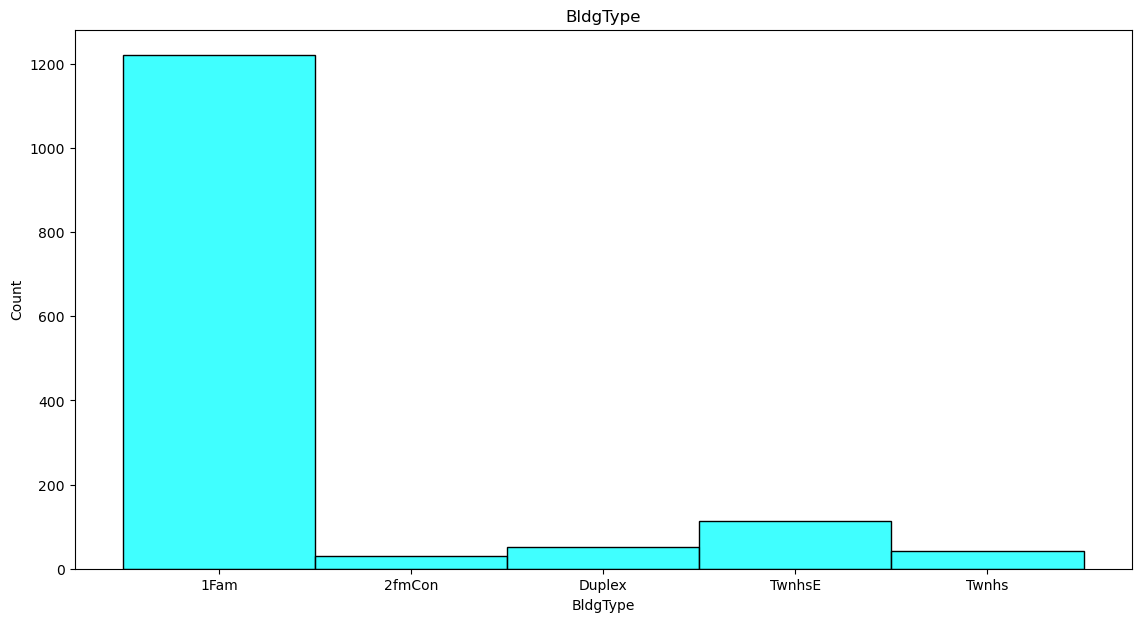

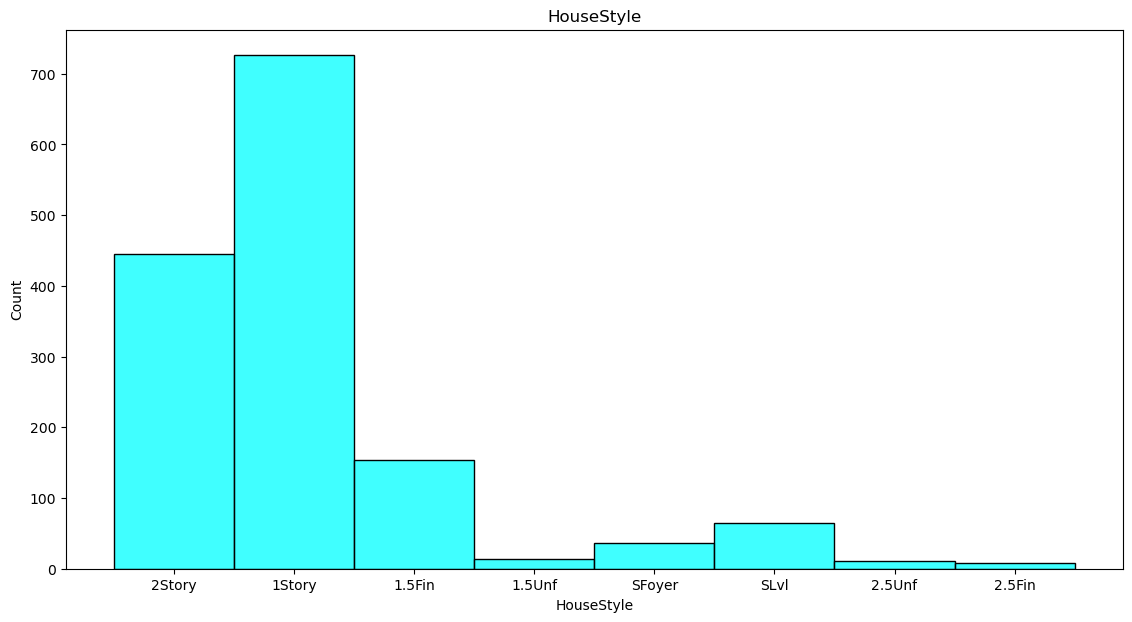

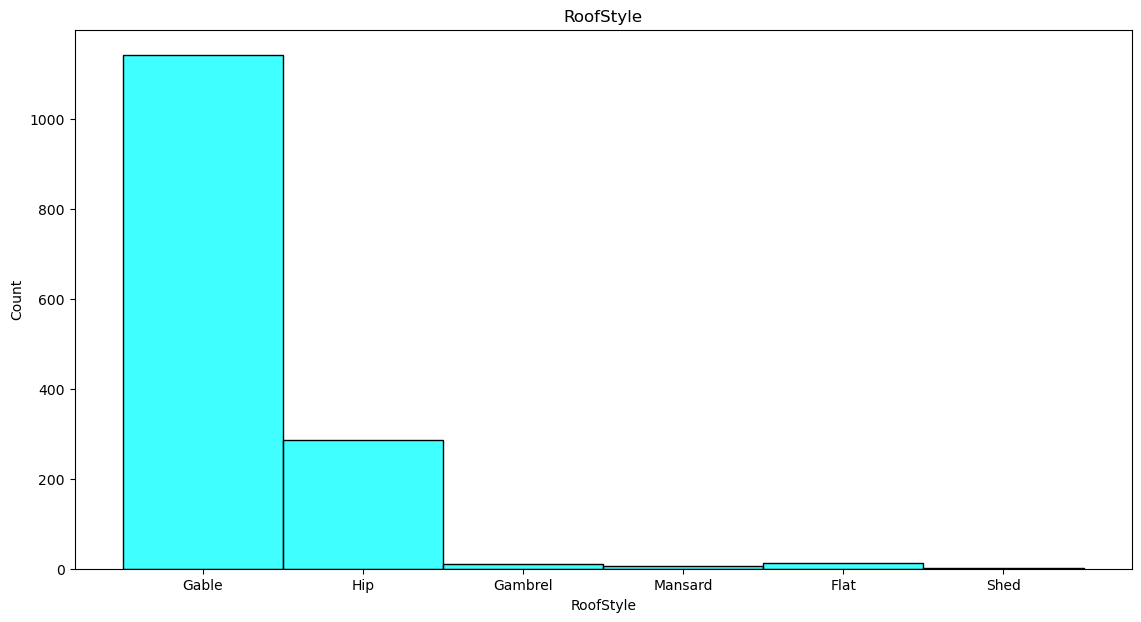

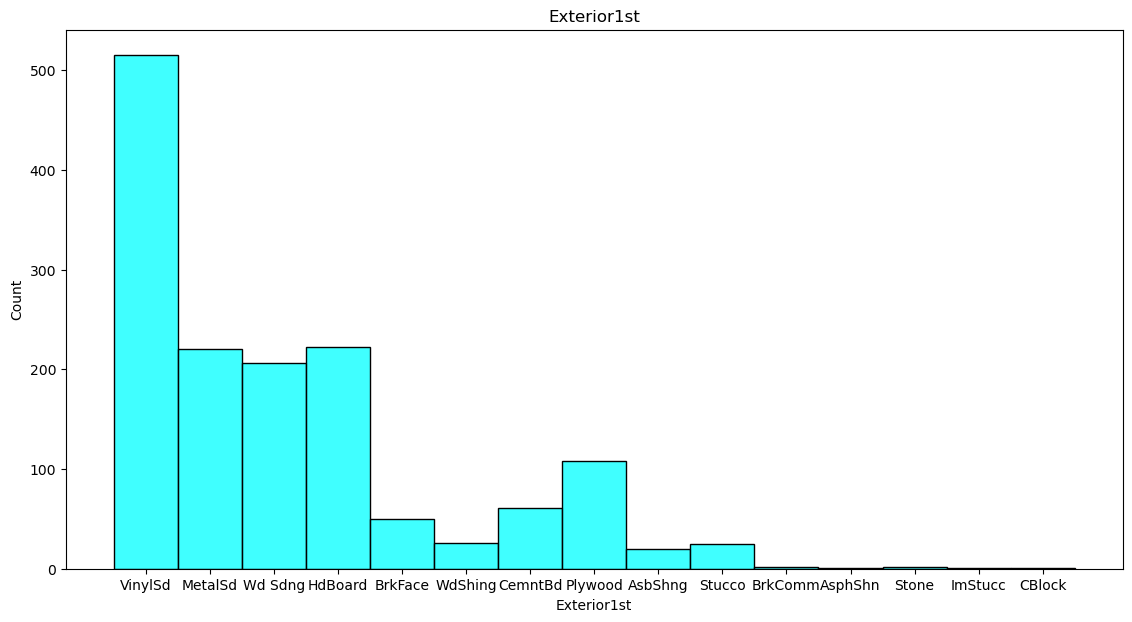

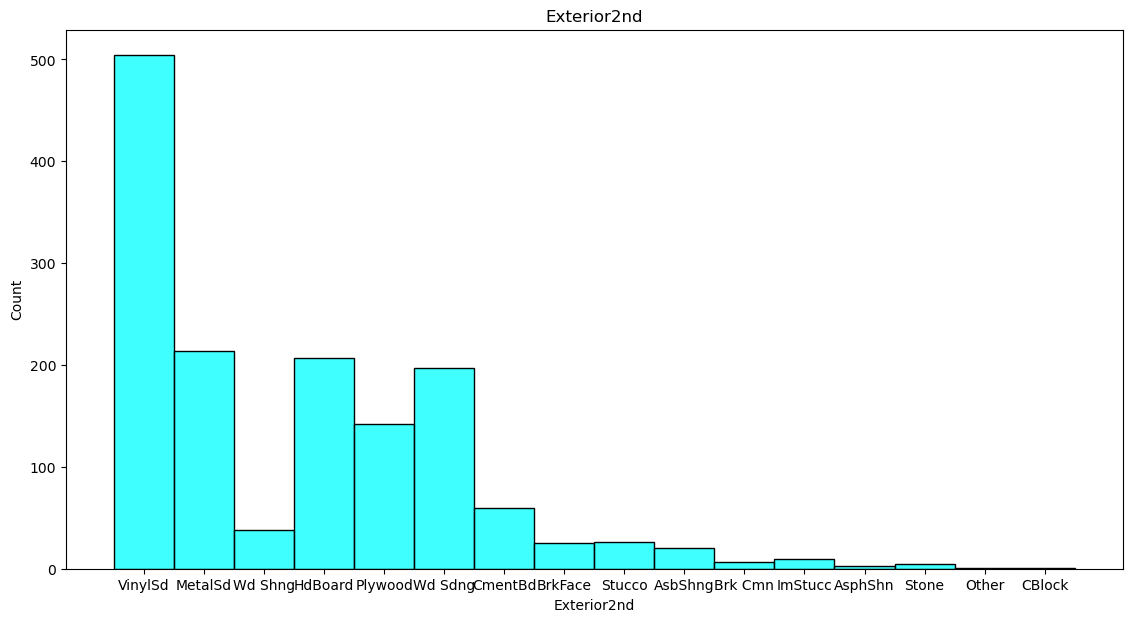

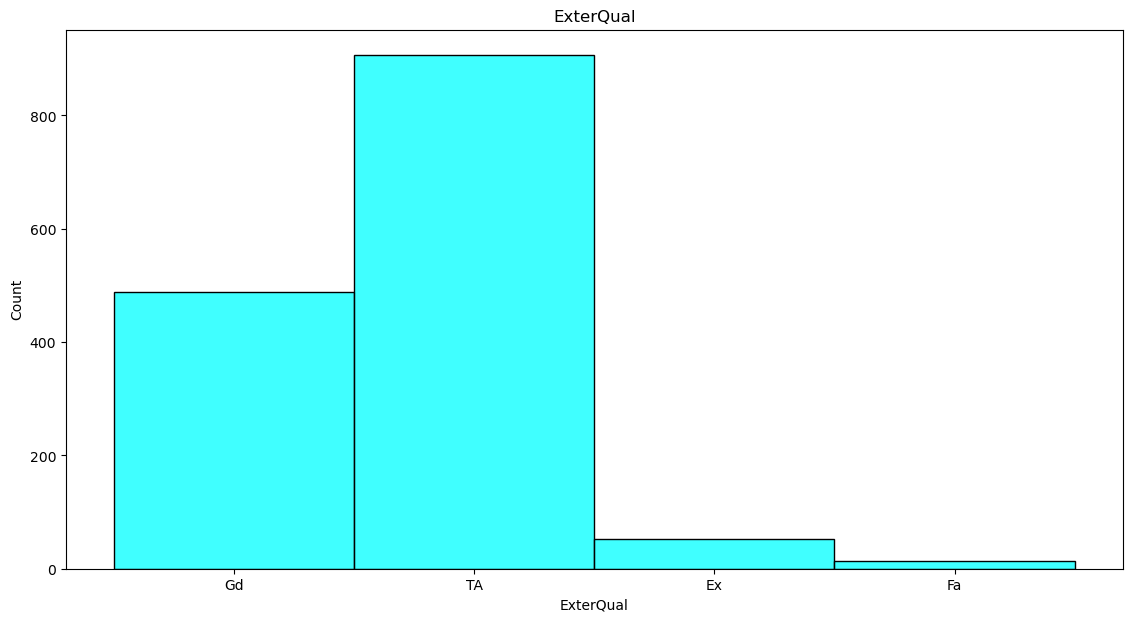

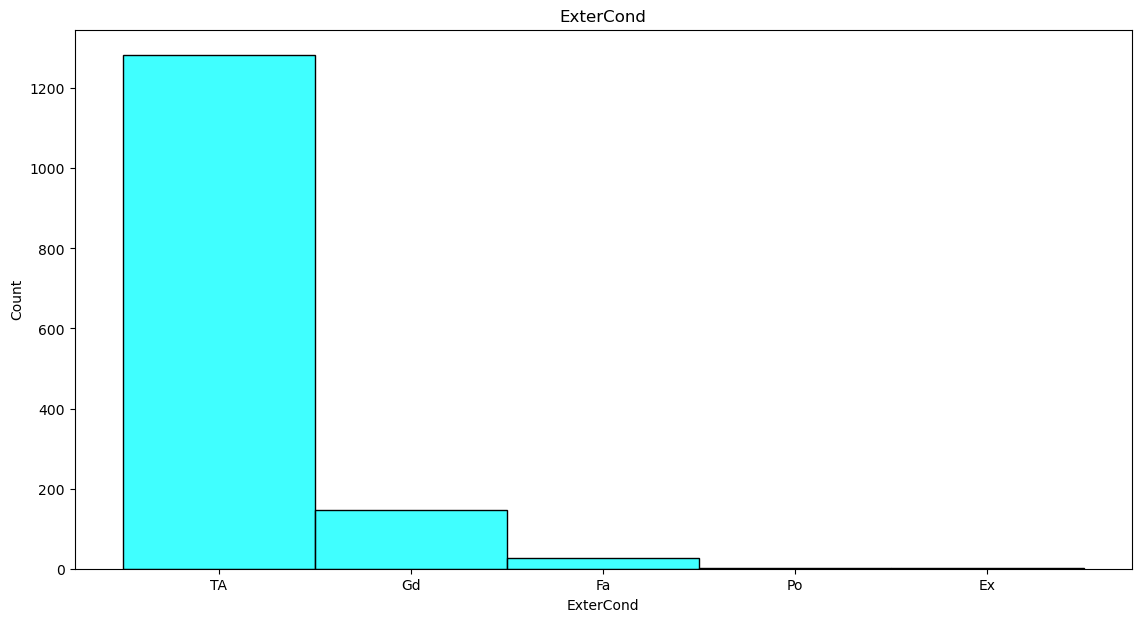

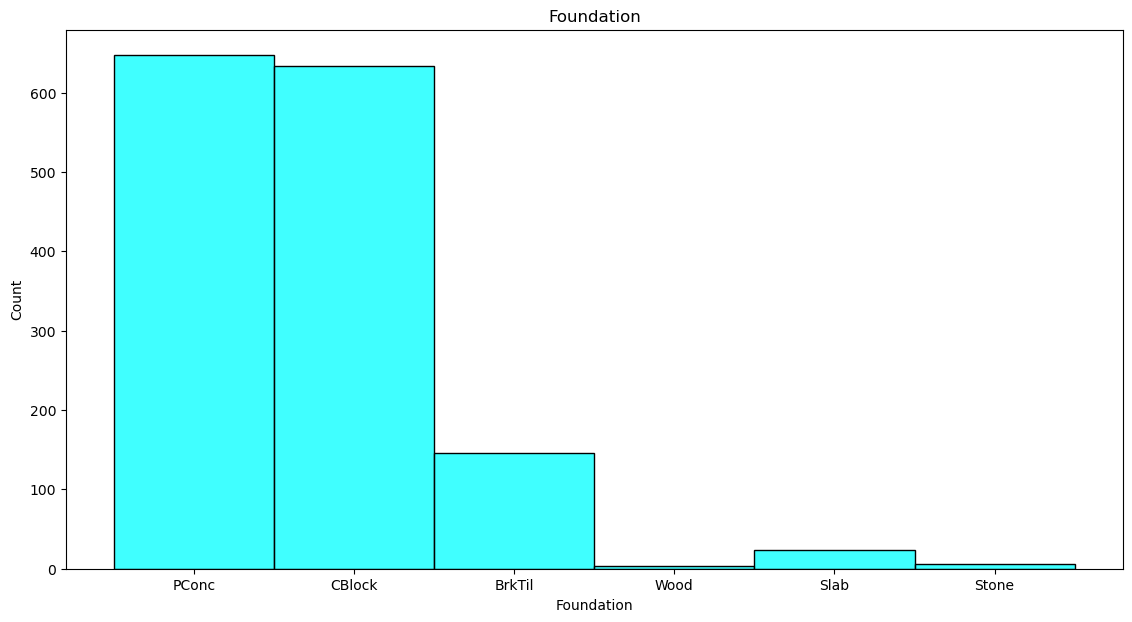

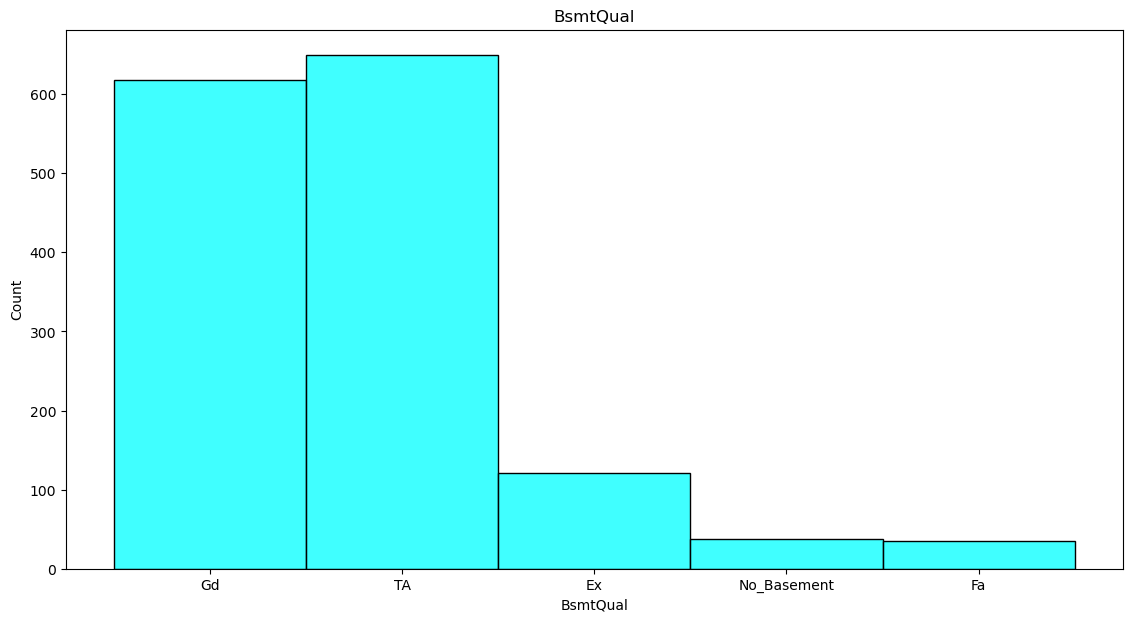

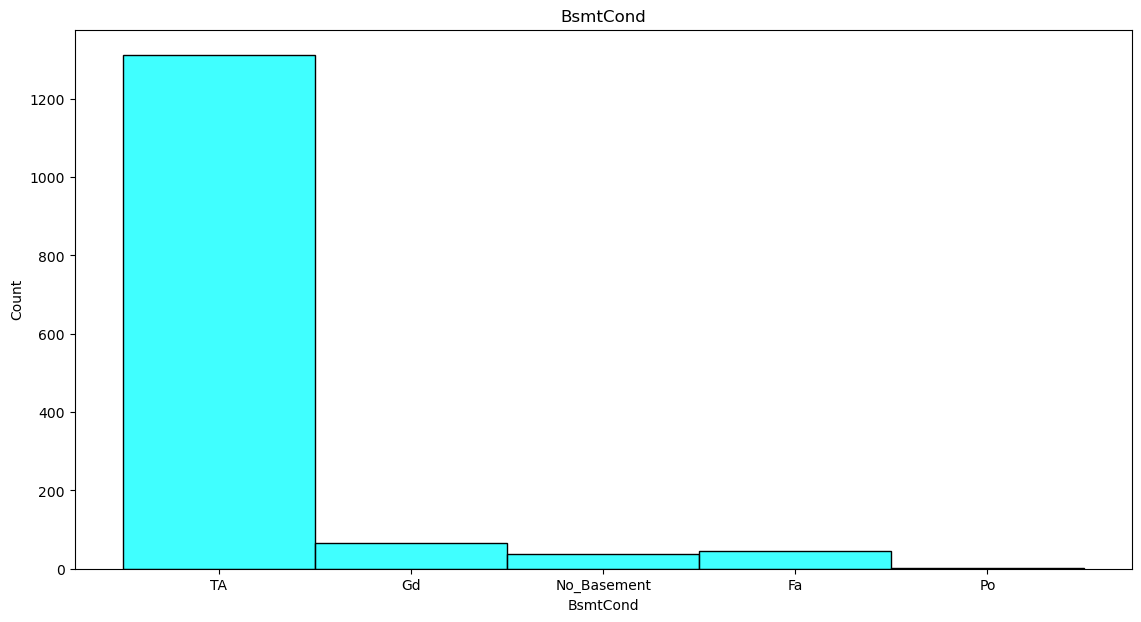

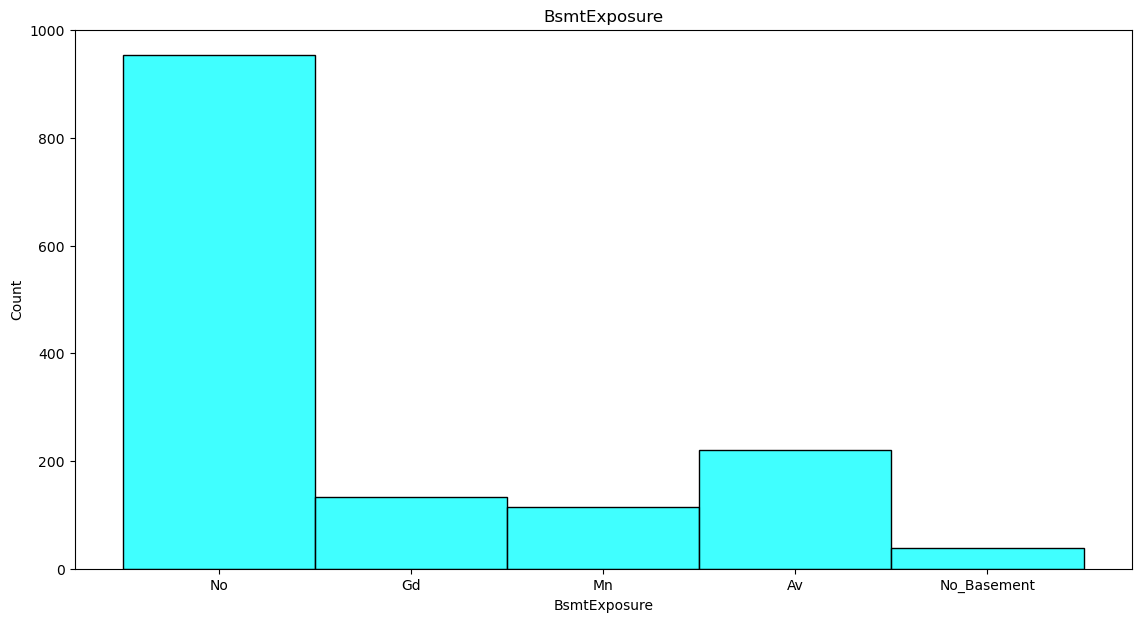

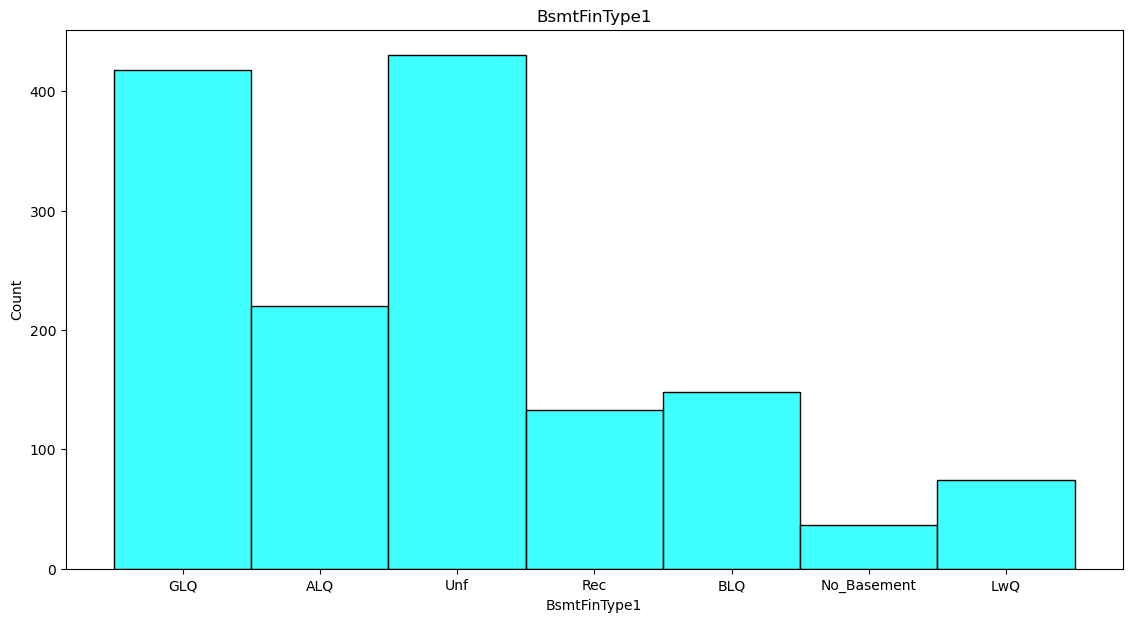

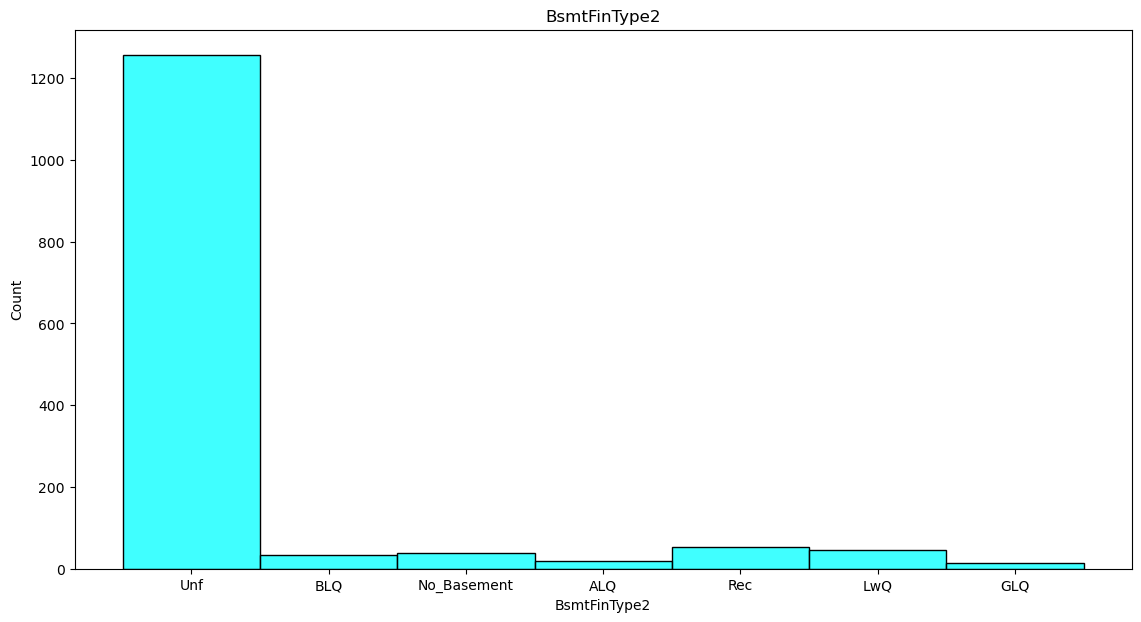

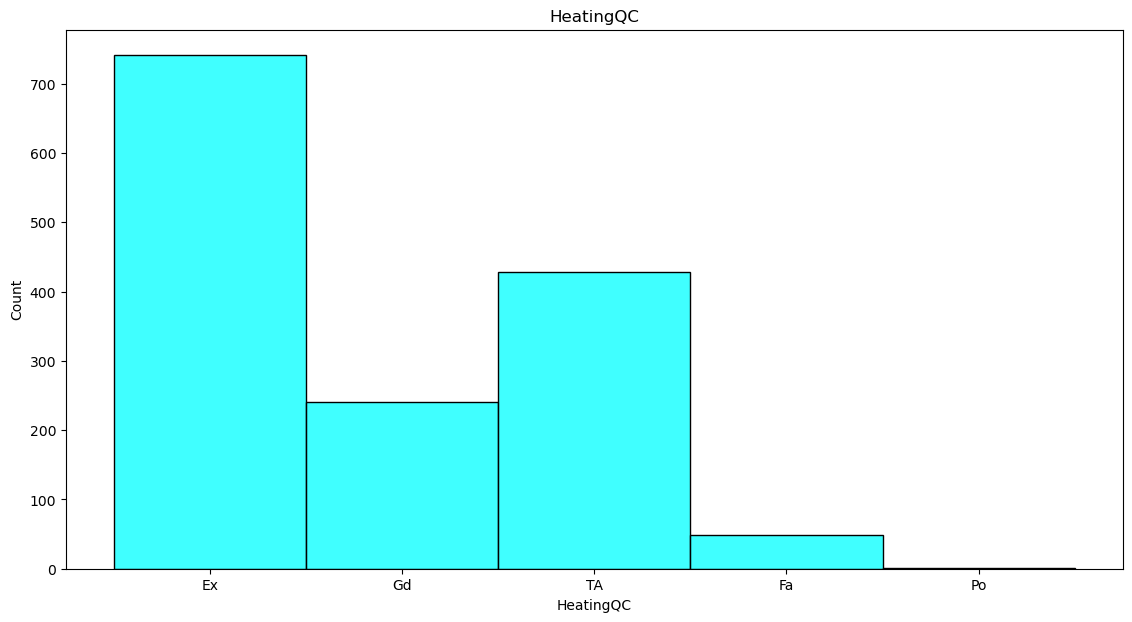

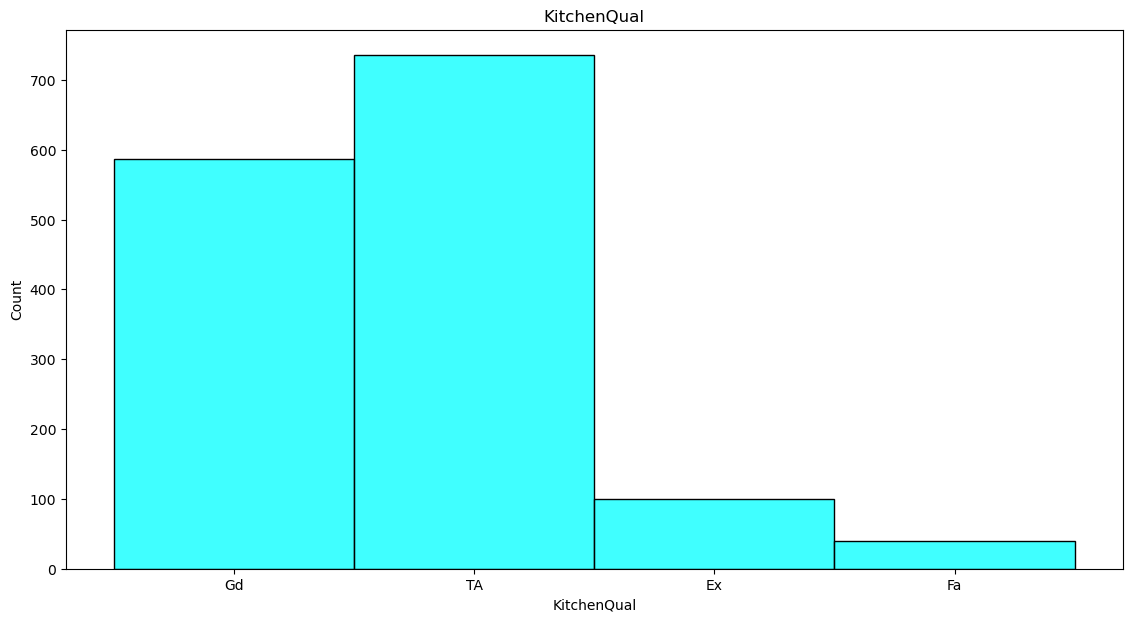

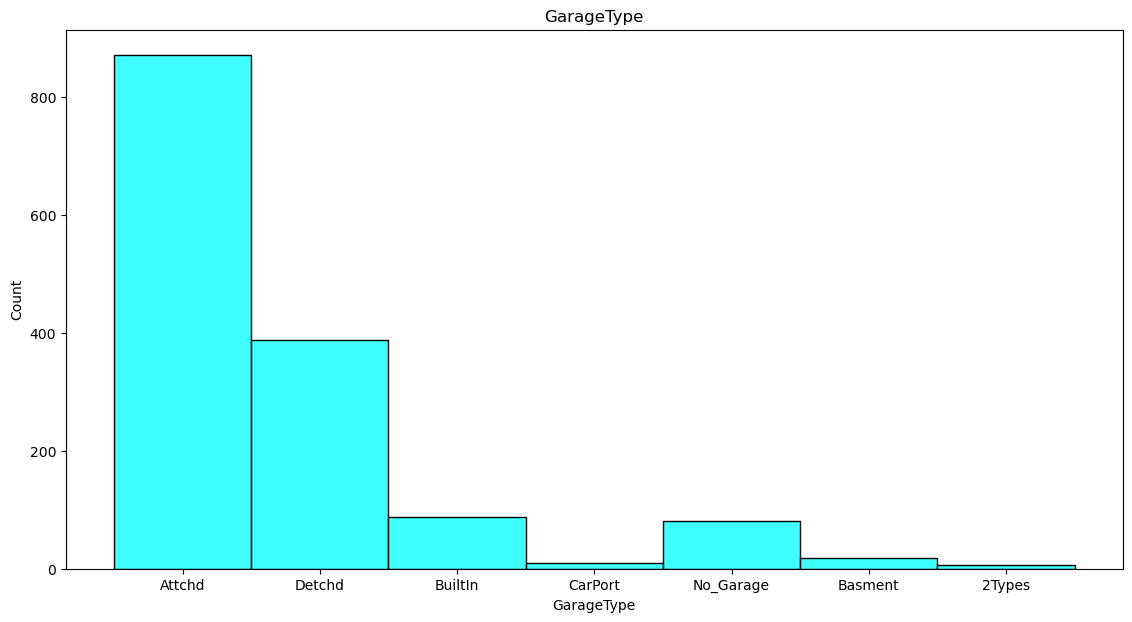

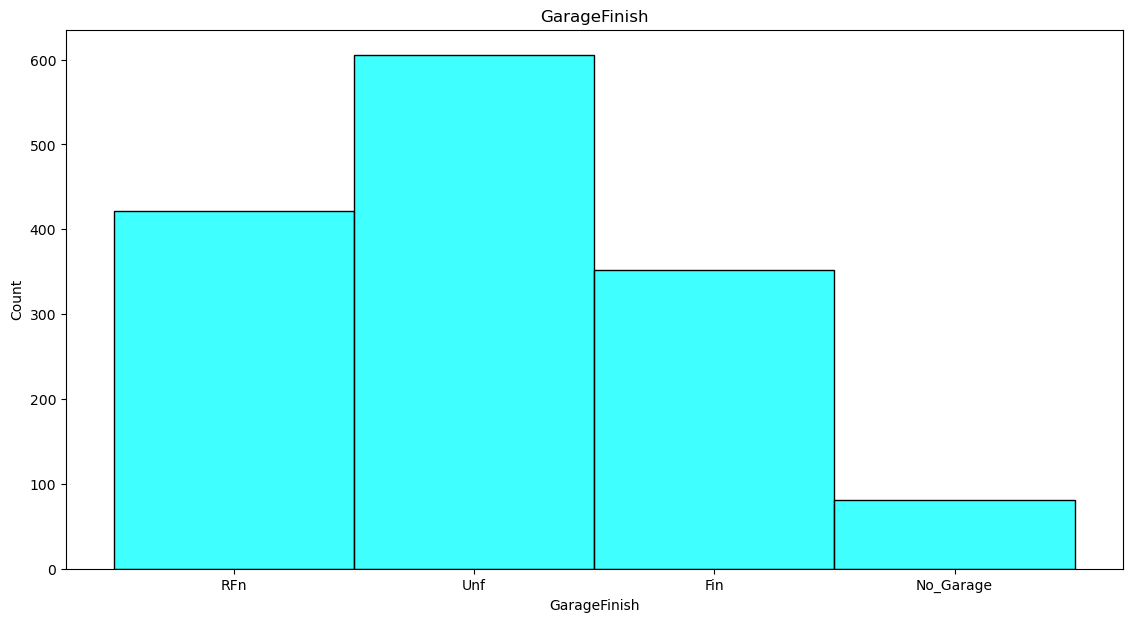

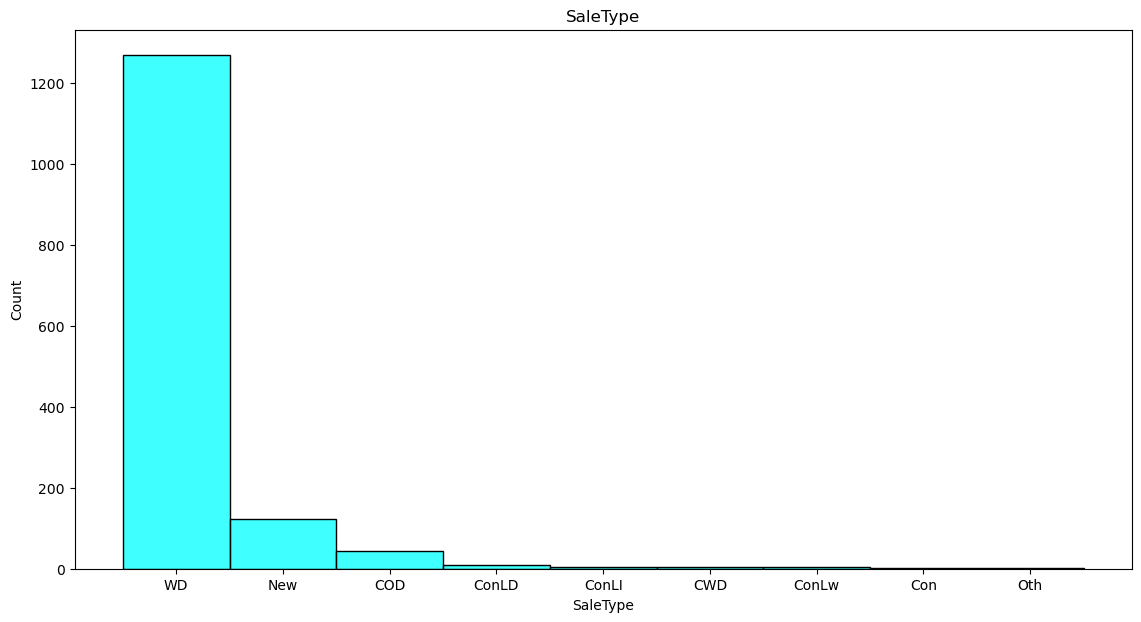

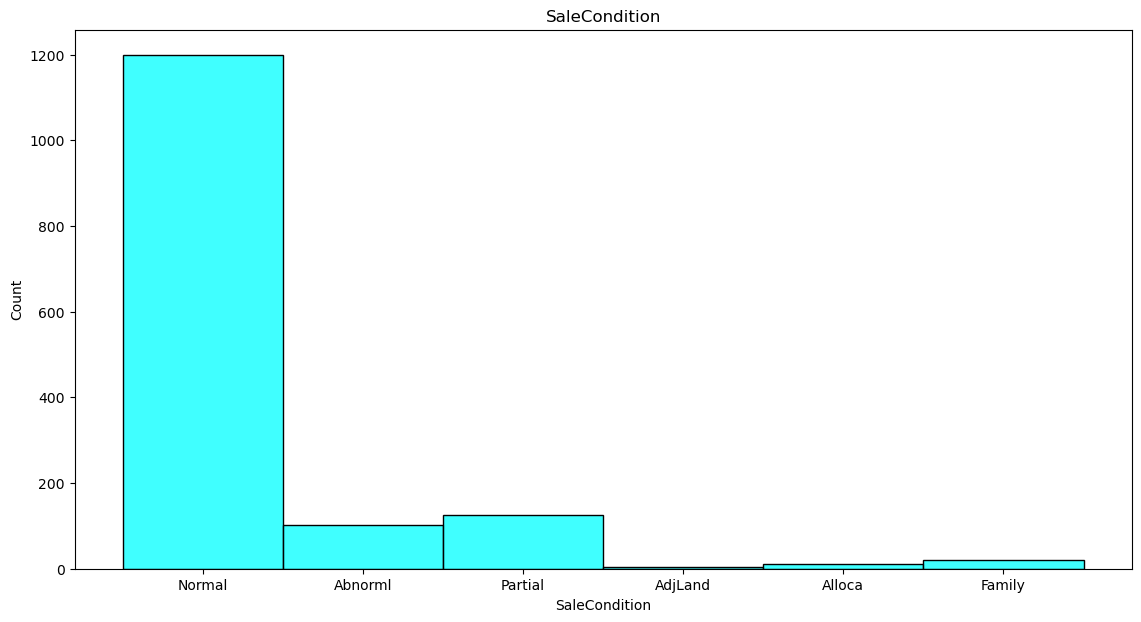

In [47]:
#function to create boxplots for all categorical variables 
categorical_variables = [f for f in df.columns if df.dtypes[f] == 'object']

#univariate analysis
for col in categorical_variables: 
    plt.figure(figsize=(30,7))
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 12})
    sns.histplot(df[col], color='cyan')
    plt.show()



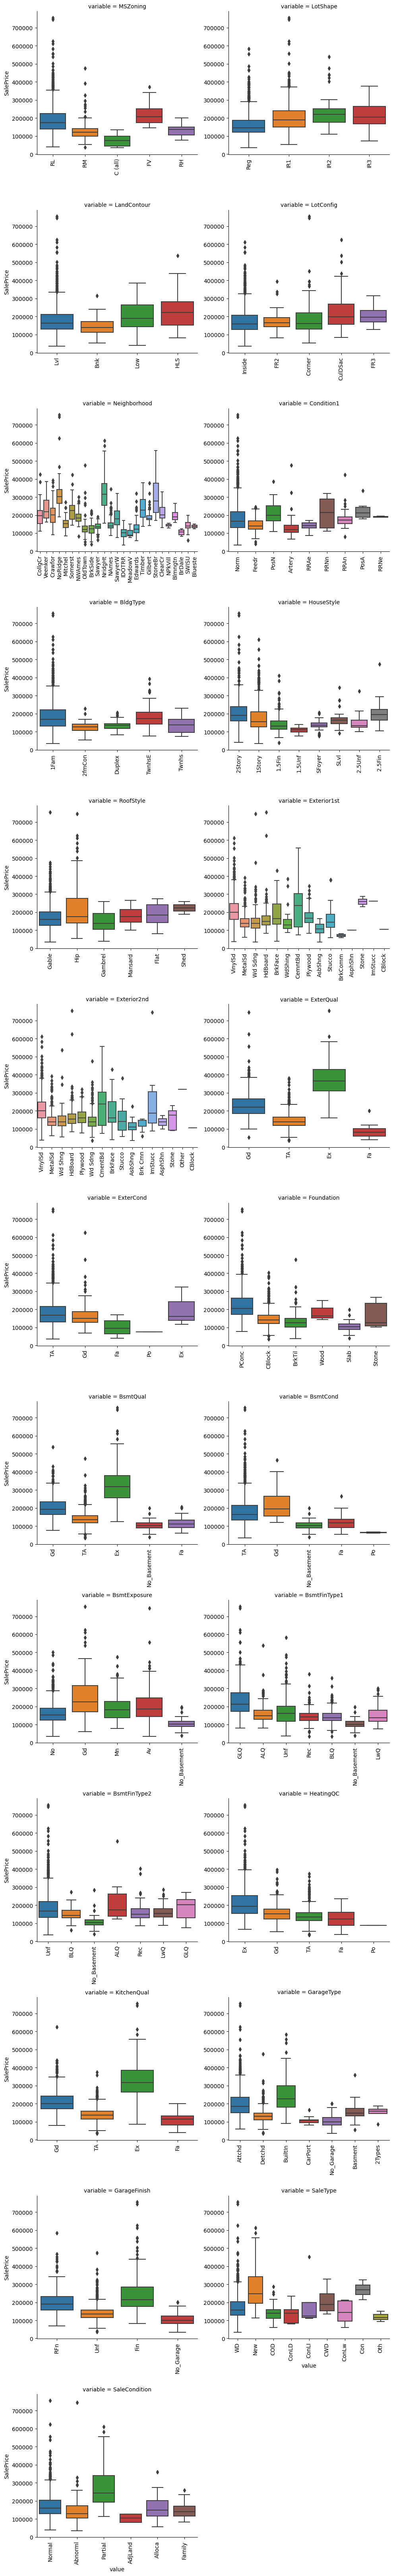

In [48]:
# Bivariate analysis
def plotBoxPlotForCategoricalVariables(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df, id_vars=['SalePrice'], value_vars=categorical_variables)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(plotBoxPlotForCategoricalVariables, "value", "SalePrice")

### finding all the numerical values after the updates

In [49]:
numerical_variables = [f for f in df.columns if df.dtypes[f] != 'int64']
numerical_variables

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

**Now let us try to understand how Garage and basement data is analysed against Saleprice**

In [50]:
# basement columns:
house_Basement = df[["BsmtQual","BsmtCond","BsmtExposure", "BsmtFinType1", "BsmtFinType2","BsmtFinSF1", "BsmtFinSF2",
                         "BsmtUnfSF","TotalBsmtSF"]]

<Figure size 2000x1200 with 0 Axes>

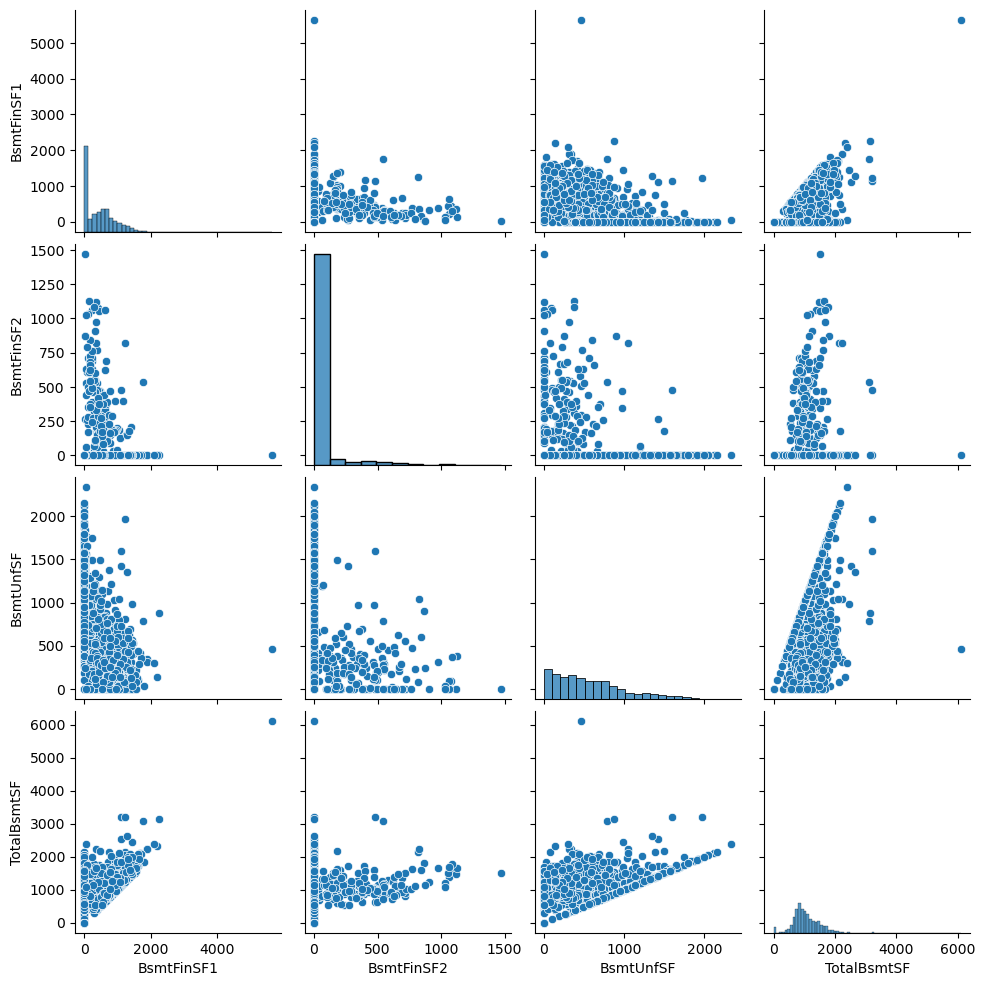

In [51]:
#plot a pair plot for basement related columns
plt.figure(figsize=(20, 12))
sns.pairplot(house_Basement)
plt.show()

**We can observe from above that BsmtFinSF1 and BsmtFinSF2 can be dropped**

In [52]:
df_num = df.select_dtypes(include=['int64'])
df_num

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             60     8450            7            5       2003          2003   
1             20     9600            6            8       1976          1976   
2             60    11250            7            5       2001          2002   
3             70     9550            7            5       1915          1970   
4             60    14260            8            5       2000          2000   
...          ...      ...          ...          ...        ...           ...   
1455          60     7917            6            5       1999          2000   
1456          20    13175            6            6       1978          1988   
1457          70     9042            7            9       1941          2006   
1458          20     9717            5            6       1950          1996   
1459          20     9937            5            6       1965          1965   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  TotRmsAbvGrd  \
0            706           0        150          856  ...             8   
1            978           0        284         1262  ...             6   
2            486           0        434          920  ...             6   
3            216           0        540          756  ...             7   
4            655           0        490         1145  ...             9   
...          ...         ...        ...          ...  ...           ...   
1455           0           0        953          953  ...             7   
1456         790         163        589         1542  ...             7   
1457         275           0        877         1152  ...             9   
1458          49        1029          0         1078  ...             5   
1459         830         290        136         1256  ...             6   

      Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0              0           2         548           0           61   
1              1           2         460         298            0   
2              1           2         608           0           42   
3              1           3         642           0           35   
4              1           3         836         192           84   
...          ...         ...         ...         ...          ...   
1455           1           2         460           0           40   
1456           2           2         500         349            0   
1457           2           1         252           0           60   
1458           0           1         240         366            0   
1459           0           1         276         736           68   

      EnclosedPorch  MoSold  YrSold  SalePrice  
0                 0       2    2008     208500  
1                 0       5    2007     181500  
2                 0       9    2008     223500  
3               272       2    2006     140000  
4                 0      12    2008     250000  
...             ...     ...     ...        ...  
1455              0       8    2007     175000  
1456              0       2    2010     210000  
1457              0       5    2010     266500  
1458            112       4    2010     142125  
1459              0       6    2008     147500  

[1460 rows x 27 columns]

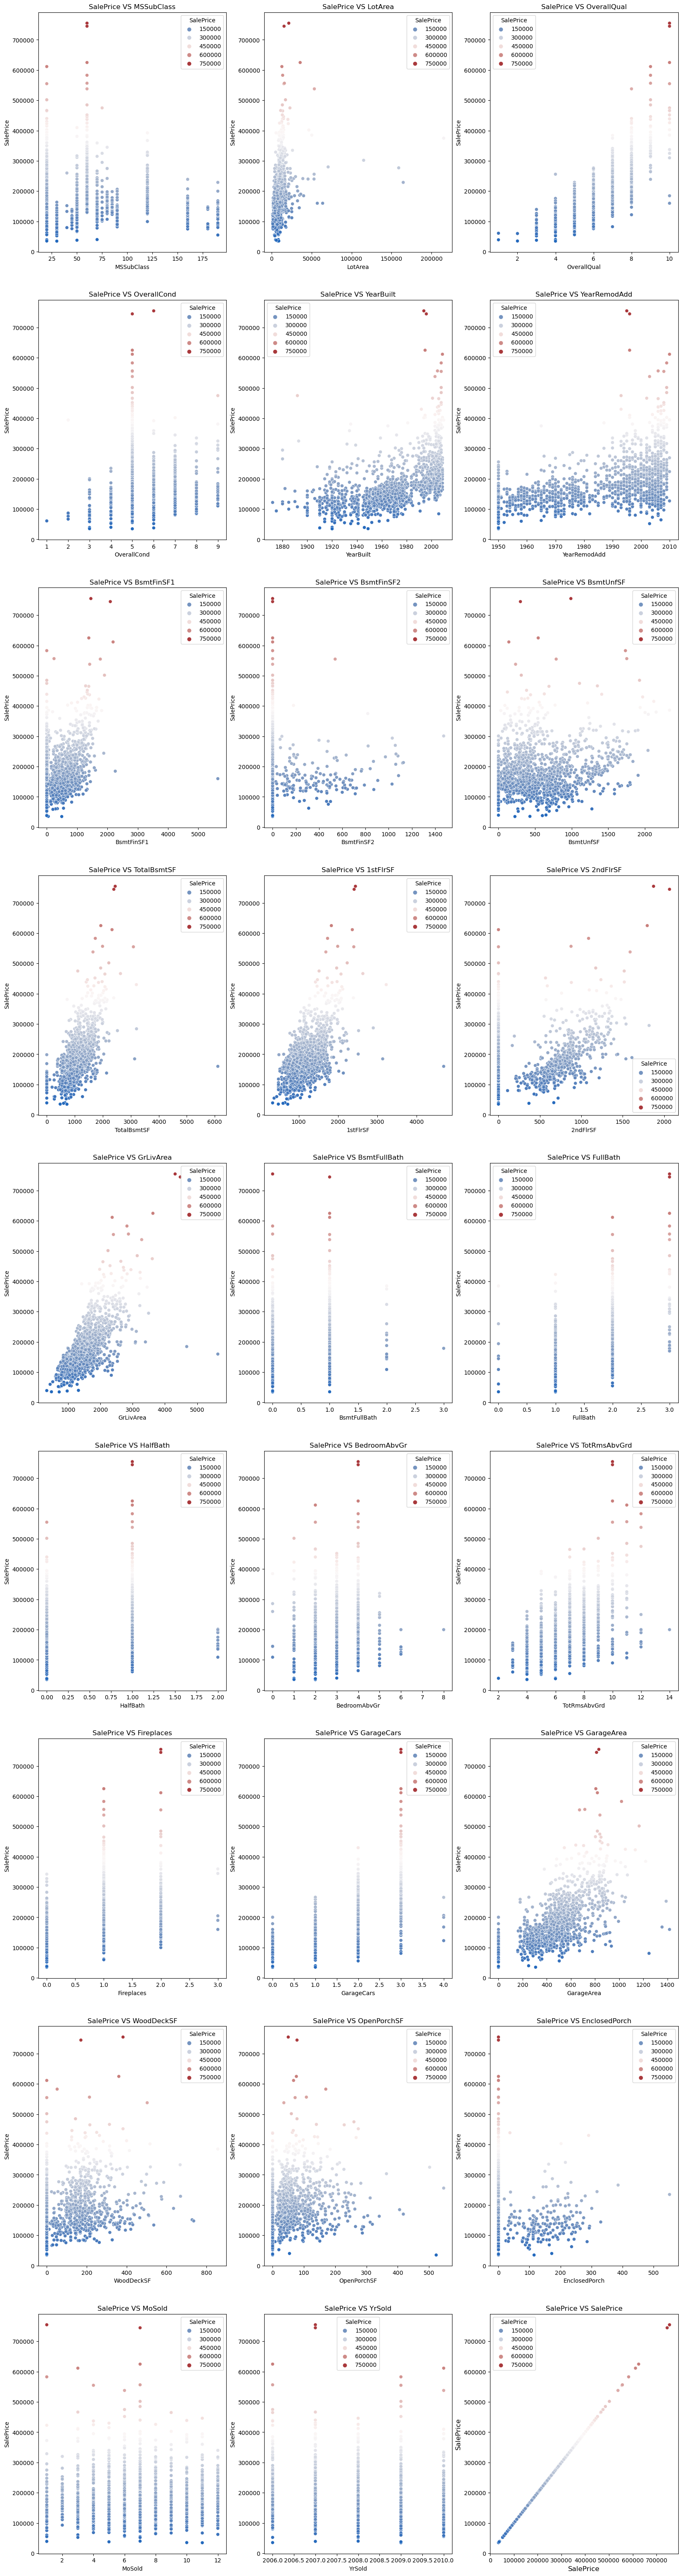

In [53]:
#Visualising numerical predictor variables with Target Variables
df_num = df.select_dtypes(include=['int64'])
fig,axs= plt.subplots(9,3,figsize=(20,80))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num,ax=ax,palette='vlag')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

#### Observations

**1. Salesprice is proportional to Above grade (ground) living area square feet .**


**2. Salesprice has some correlation with total basement area.**


**3. New properties are more expensive then old properties.**

**Let's plot a correlation map to see how correlated all these varialbes are to Salesprice**

In [54]:
# Checking the correlation between the variables
corr_ = df_num.corr()
corr_

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  \
MSSubClass       1.000000 -0.139781     0.032628    -0.059316   0.027850   
LotArea         -0.139781  1.000000     0.105806    -0.005636   0.014228   
OverallQual      0.032628  0.105806     1.000000    -0.091932   0.572323   
OverallCond     -0.059316 -0.005636    -0.091932     1.000000  -0.375983   
YearBuilt        0.027850  0.014228     0.572323    -0.375983   1.000000   
YearRemodAdd     0.040581  0.013788     0.550684     0.073741   0.592855   
BsmtFinSF1      -0.069836  0.214103     0.239666    -0.046231   0.249503   
BsmtFinSF2      -0.065649  0.111170    -0.059119     0.040229  -0.049107   
BsmtUnfSF       -0.140759 -0.002618     0.308159    -0.136841   0.149040   
TotalBsmtSF     -0.238518  0.260833     0.537808    -0.171098   0.391452   
1stFlrSF        -0.251758  0.299475     0.476224    -0.144203   0.281986   
2ndFlrSF         0.307886  0.050986     0.295493     0.028942   0.010308   
GrLivArea        0.074853  0.263116     0.593007    -0.079686   0.199010   
BsmtFullBath     0.003491  0.158155     0.111098    -0.054942   0.187599   
FullBath         0.131608  0.126031     0.550600    -0.194149   0.468271   
HalfBath         0.177354  0.014259     0.273458    -0.060769   0.242656   
BedroomAbvGr    -0.023438  0.119690     0.101676     0.012980  -0.070651   
TotRmsAbvGrd     0.040380  0.190015     0.427452    -0.057583   0.095589   
Fireplaces      -0.045569  0.271364     0.396765    -0.023820   0.147716   
GarageCars      -0.040110  0.154871     0.600671    -0.185758   0.537850   
GarageArea      -0.098672  0.180403     0.562022    -0.151521   0.478954   
WoodDeckSF      -0.012579  0.171698     0.238923    -0.003334   0.224880   
OpenPorchSF     -0.006100  0.084774     0.308819    -0.032589   0.188686   
EnclosedPorch   -0.012037 -0.018340    -0.113937     0.070356  -0.387268   
MoSold          -0.013585  0.001205     0.070815    -0.003511   0.012398   
YrSold          -0.021407 -0.014261    -0.027347     0.043950  -0.013618   
SalePrice       -0.084284  0.263843     0.790982    -0.077856   0.522897   

               YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
MSSubClass         0.040581   -0.069836   -0.065649  -0.140759    -0.238518   
LotArea            0.013788    0.214103    0.111170  -0.002618     0.260833   
OverallQual        0.550684    0.239666   -0.059119   0.308159     0.537808   
OverallCond        0.073741   -0.046231    0.040229  -0.136841    -0.171098   
YearBuilt          0.592855    0.249503   -0.049107   0.149040     0.391452   
YearRemodAdd       1.000000    0.128451   -0.067759   0.181133     0.291066   
BsmtFinSF1         0.128451    1.000000   -0.050117  -0.495251     0.522396   
BsmtFinSF2        -0.067759   -0.050117    1.000000  -0.209294     0.104810   
BsmtUnfSF          0.181133   -0.495251   -0.209294   1.000000     0.415360   
TotalBsmtSF        0.291066    0.522396    0.104810   0.415360     1.000000   
1stFlrSF           0.240379    0.445863    0.097117   0.317987     0.819530   
2ndFlrSF           0.140024   -0.137079   -0.099260   0.004469    -0.174512   
GrLivArea          0.287389    0.208171   -0.009640   0.240257     0.454868   
BsmtFullBath       0.119470    0.649212    0.158678  -0.422900     0.307351   
FullBath           0.439046    0.058543   -0.076444   0.288886     0.323722   
HalfBath           0.183331    0.004262   -0.032148  -0.041118    -0.048804   
BedroomAbvGr      -0.040581   -0.107355   -0.015728   0.166643     0.050450   
TotRmsAbvGrd       0.191740    0.044316   -0.035227   0.250647     0.285573   
Fireplaces         0.112581    0.260011    0.046921   0.051575     0.339519   
GarageCars         0.420622    0.224054   -0.038264   0.214175     0.434585   
GarageArea         0.371600    0.296970   -0.018227   0.183303     0.486665   
WoodDeckSF         0.205726    0.204306    0.067898  -0.005316     0.232019   
OpenPorchSF        0.226298    0.111761    0.003093   0.129005     0.

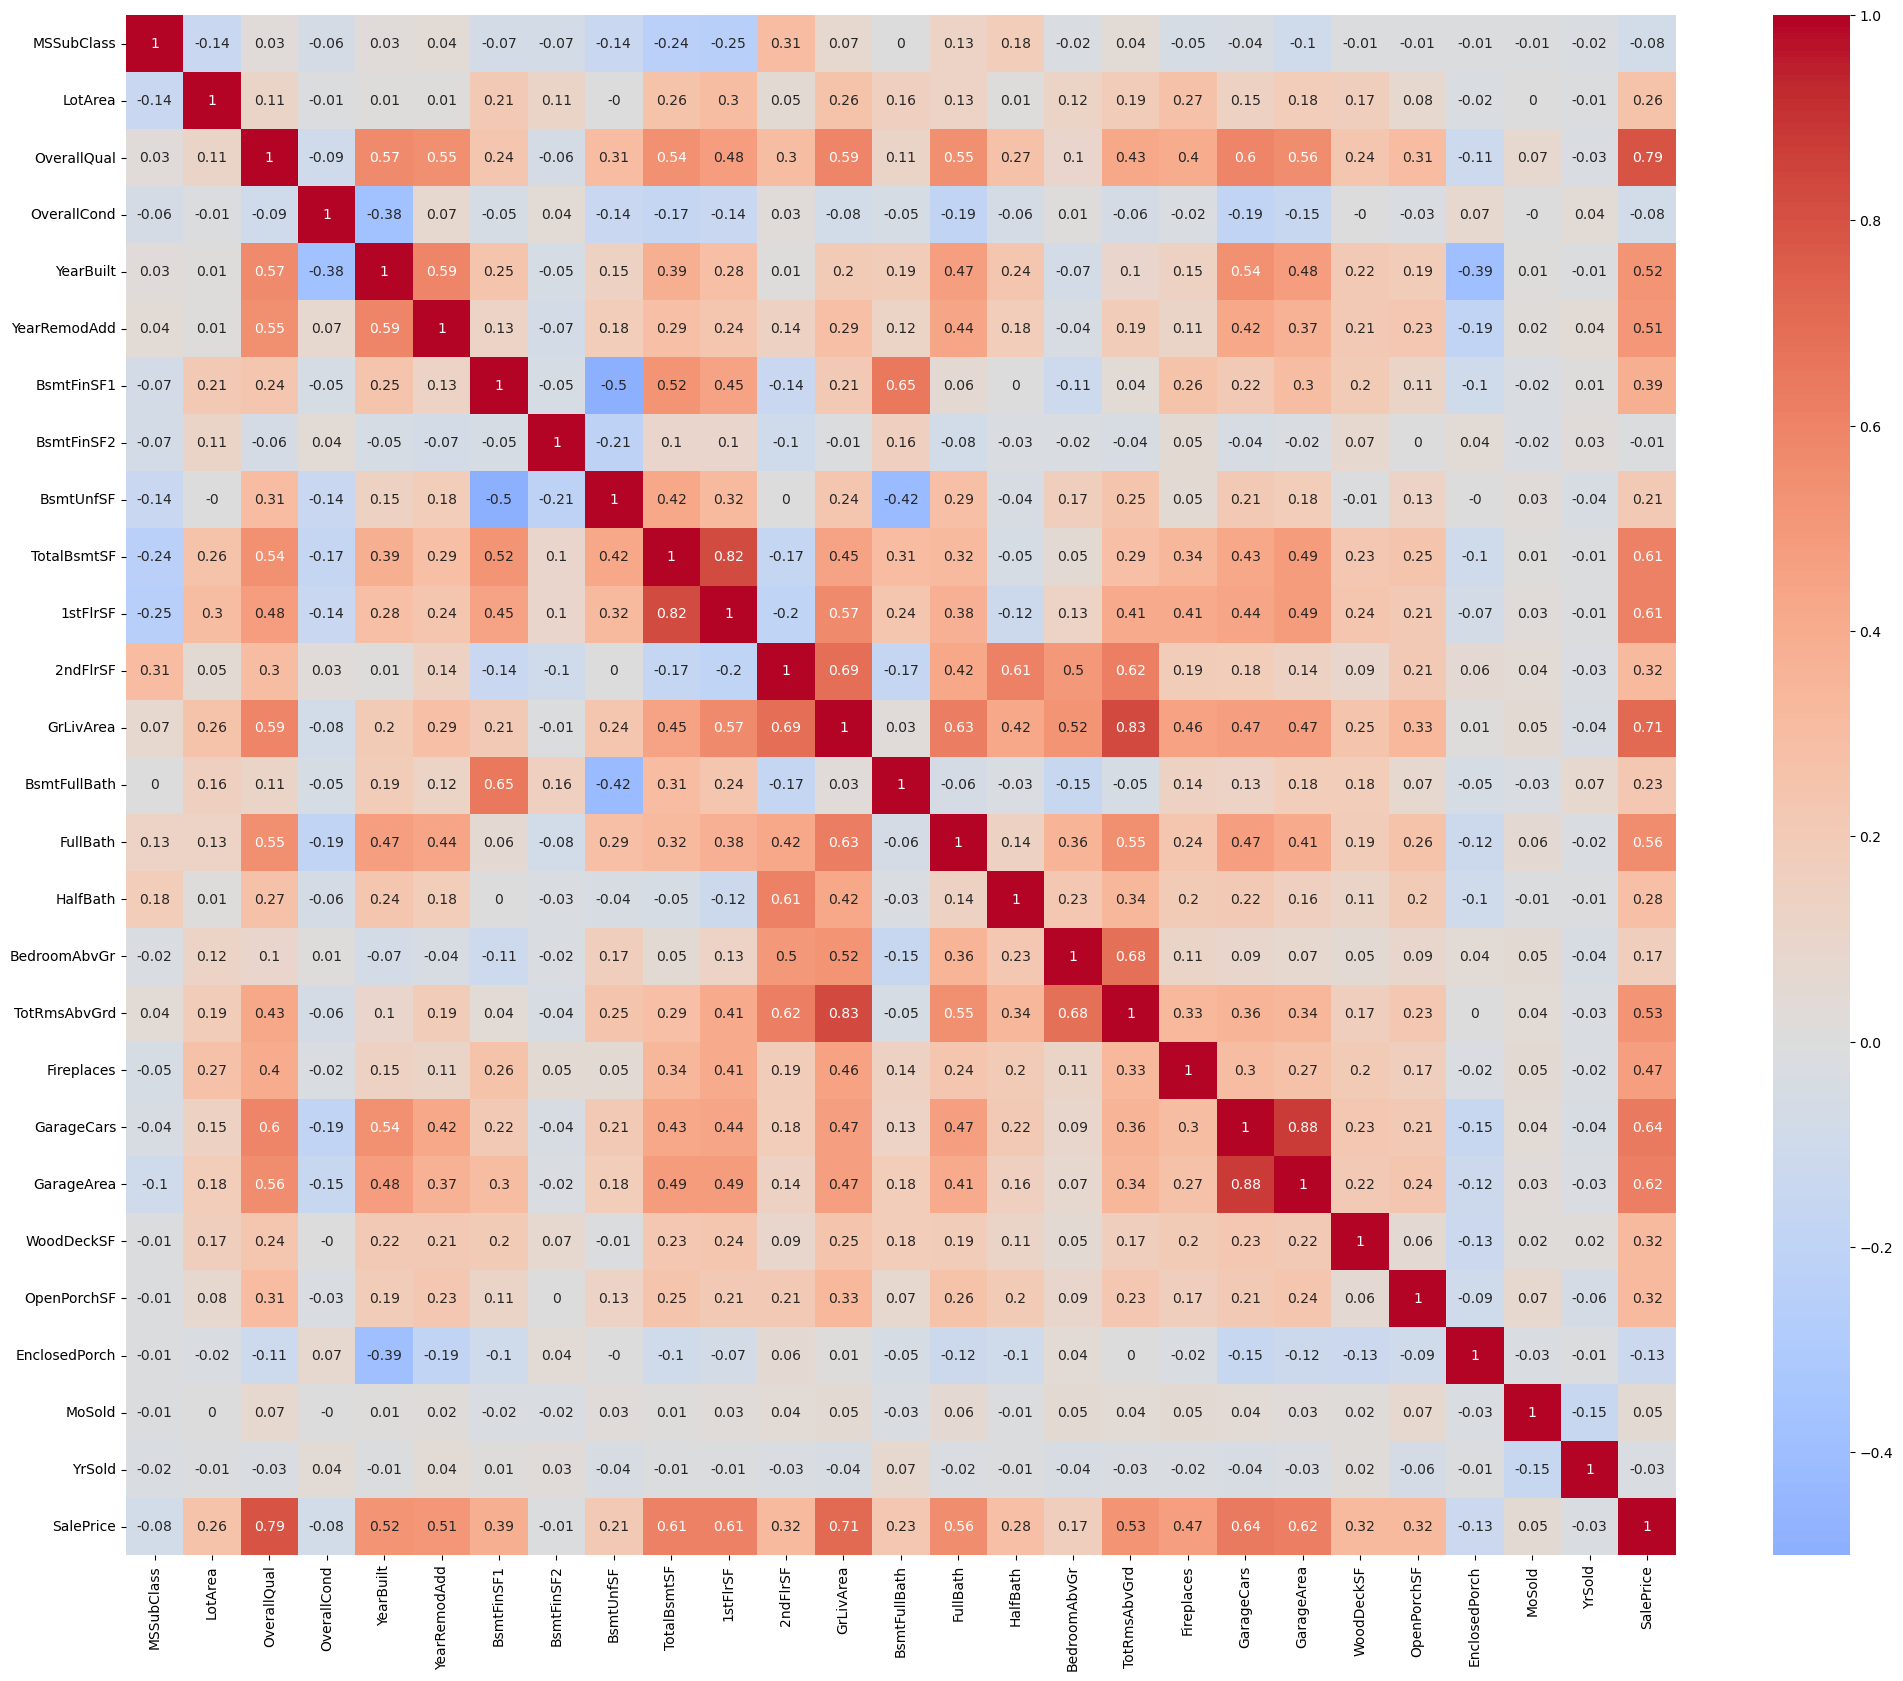

In [55]:
# Checking the corelation
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(df_num.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

**From the correlation heatmap given above we can see that some of the numerical colums are highly co-related with the sales price**

- Overall Quality
- Age
- TotalBsmntSF
- 1st Floor SF
- GrLivArea
- Fullbath
- Fireplaces
- Garage Area



**Let's drop the highly correlated features.**

In [56]:
df.drop(['OverallQual','TotalBsmtSF',
        '1stFlrSF','2ndFlrSF','GrLivArea','FullBath','GarageCars'],
         axis=1,inplace=True)

**We have some categorical data that is showing up in numerical . Le's prepare the data to handle these.**

## 4. Data Preparation

### 4.1 Preparation of new columns

**There are four columns which gives us details about the years of the construction. Deriving a new column Age of building and dropping the other columns. we take the remodel date because if the house is remodel it means they have made it better so it would not be right to take original date of built**

In [57]:
df['Age']=df['YrSold']-df['YearRemodAdd']
df['Age'].head()

0     5
1    31
2     6
3    36
4     8
Name: Age, dtype: int64

In [58]:
df=df.drop(['YrSold', 'MoSold','YearBuilt','YearRemodAdd'], axis = 1) 

In [59]:
# find all categorical variables
print(categorical_variables)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition']


In [60]:
df[categorical_variables]

MSZoning LotShape LandContour LotConfig Neighborhood Condition1 BldgType  \
0          RL      Reg         Lvl    Inside      CollgCr       Norm     1Fam   
1          RL      Reg         Lvl       FR2      Veenker      Feedr     1Fam   
2          RL      IR1         Lvl    Inside      CollgCr       Norm     1Fam   
3          RL      IR1         Lvl    Corner      Crawfor       Norm     1Fam   
4          RL      IR1         Lvl       FR2      NoRidge       Norm     1Fam   
...       ...      ...         ...       ...          ...        ...      ...   
1455       RL      Reg         Lvl    Inside      Gilbert       Norm     1Fam   
1456       RL      Reg         Lvl    Inside       NWAmes       Norm     1Fam   
1457       RL      Reg         Lvl    Inside      Crawfor       Norm     1Fam   
1458       RL      Reg         Lvl    Inside        NAmes       Norm     1Fam   
1459       RL      Reg         Lvl    Inside      Edwards       Norm     1Fam   

     HouseStyle RoofStyle Exterior1st  ... BsmtCond BsmtExposure BsmtFinType1  \
0        2Story     Gable     VinylSd  ...       TA           No          GLQ   
1        1Story     Gable     MetalSd  ...       TA           Gd          ALQ   
2        2Story     Gable     VinylSd  ...       TA           Mn          GLQ   
3        2Story     Gable     Wd Sdng  ...       Gd           No          ALQ   
4        2Story     Gable     VinylSd  ...       TA           Av          GLQ   
...         ...       ...         ...  ...      ...          ...          ...   
1455     2Story     Gable     VinylSd  ...       TA           No          Unf   
1456     1Story     Gable     Plywood  ...       TA           No          ALQ   
1457     2Story     Gable     CemntBd  ...       Gd           No          GLQ   
1458     1Story       Hip     MetalSd  ...       TA           Mn          GLQ   
1459     1Story     Gable     HdBoard  ...       TA           No          BLQ   

     BsmtFinType2 HeatingQC KitchenQual GarageType GarageFinish SaleType  \
0             Unf        Ex          Gd     Attchd          RFn       WD   
1             Unf        Ex          TA     Attchd          RFn       WD   
2             Unf        Ex          Gd     Attchd          RFn       WD   
3             Unf        Gd          Gd     Detchd          Unf       WD   
4             Unf        Ex          Gd     Attchd          RFn       WD   
...           ...       ...         ...        ...          ...      ...   
1455          Unf        Ex          TA     Attchd          RFn       WD   
1456          Rec        TA          TA     Attchd          Unf       WD   
1457          Unf        Ex          Gd     Attchd          RFn       WD   
1458          Rec        Gd          Gd     Attchd          Unf       WD   
1459          LwQ        Gd          TA     Attchd          Fin       WD   

     SaleCondition  
0           Normal  
1           Normal  
2           Normal  
3          Abnorml  
4           Normal  
...            ...  
1455        Normal  
1456        Normal  
1457        Normal  
1458        Normal  
1459        Normal  

[1460 rows x 25 columns]

### 4.2 Dummy variable creation

In [61]:
#Creating Dummy Variables for Categorical Columns
num_col=[]
cat_col=[]
for i in df.columns:
    if df[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
dummy_df= pd.get_dummies(df[cat_col])   
df=pd.concat([df,dummy_df],axis=1)
df= df.drop(cat_col,axis=1) 

In [62]:
df = df.replace([True, False], [1, 0])

In [63]:
df

MSSubClass  LotArea  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0             60     8450            5       196.0         706           0   
1             20     9600            8         0.0         978           0   
2             60    11250            5       162.0         486           0   
3             70     9550            5         0.0         216           0   
4             60    14260            5       350.0         655           0   
...          ...      ...          ...         ...         ...         ...   
1455          60     7917            5         0.0           0           0   
1456          20    13175            6       119.0         790         163   
1457          70     9042            9         0.0         275           0   
1458          20     9717            6         0.0          49        1029   
1459          20     9937            6         0.0         830         290   

      BsmtUnfSF  BsmtFullBath  HalfBath  BedroomAbvGr  ...  SaleType_ConLw  \
0           150             1         1             3  ...               0   
1           284             0         0             3  ...               0   
2           434             1         1             3  ...               0   
3           540             1         0             3  ...               0   
4           490             1         1             4  ...               0   
...         ...           ...       ...           ...  ...             ...   
1455        953             0         1             3  ...               0   
1456        589             1         0             3  ...               0   
1457        877             0         0             4  ...               0   
1458          0             1         0             2  ...               0   
1459        136             1         1             3  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0                0             0            1                      0   
1                0             0            1                      0   
2                0             0            1                      0   
3                0             0            1                      1   
4                0             0            1                      0   
...            ...           ...          ...                    ...   
1455             0             0            1                      0   
1456             0             0            1                      0   
1457             0             0            1                      0   
1458             0             0            1                      0   
1459             0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
14

In [64]:
df.shape

(1460, 200)

## 5. Data Modelling

### 5.1 Removal of outlier 

In [65]:
# numerical variables are updated
numerical_variables = [f for f in df.columns if df.dtypes[f] == 'int64']
numerical_variables

['MSSubClass',
 'LotArea',
 'OverallCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'BsmtFullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'SalePrice',
 'Age']

In [66]:
#Drop records with outliers present lower quantile is .25, upper quantile is .99
def remove_outliers(df=df):
    """
        Drop records with outliers present
        Lower quantile is .25, Upper quantile is .99
    """
    for column in numerical_variables:
        Q1 = df[column].quantile(.25)
        Q3 = df[column].quantile(.99)
        IQR = Q3 - Q1
        df = df[(df[column] >= (Q1 - (1.5 * IQR))) & df[column] <= (Q3 + (1.5 * IQR))]
    return df

In [67]:
df = remove_outliers(df)
df.shape

(1460, 200)

<Axes: xlabel='SalePrice'>

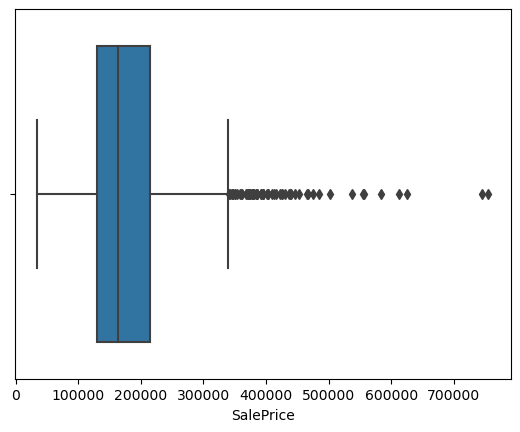

In [68]:
# if we compare it with the total outliers
sns.boxplot(x='SalePrice', data=df)

**If we plot the salesprice values , they will be skewed and will not follow gaussian curve**

<Axes: xlabel='SalePrice', ylabel='Density'>

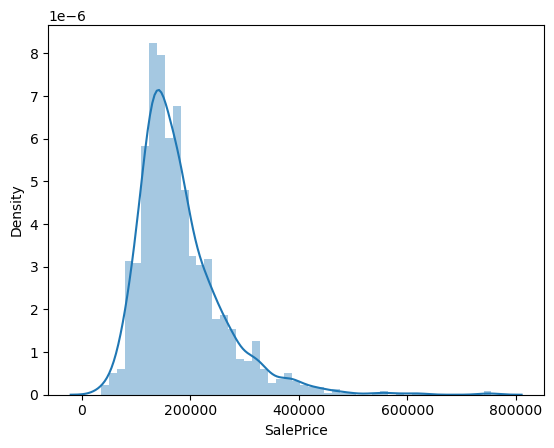

In [69]:
sns.distplot(df['SalePrice'])

**We will transform this data in train and test split**

### 5.2 Splitting into Test and Train set

In [70]:
# removing SalesPrice
y = df.pop('SalePrice')
X = df

In [71]:
# Scaling the values
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [72]:
# Generating a 70:30 split using train_test_split taking random state 42
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

**We had observed that y-data was skewed and not following Gaussian. We can tranform this data before creating our model**

In [73]:
#Transforming the Target feature to make the data gaussian
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

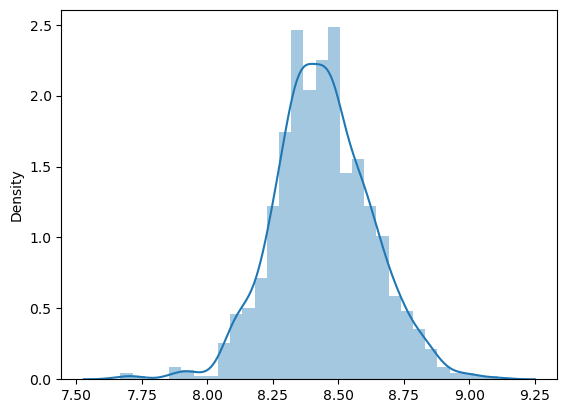

In [74]:
sns.distplot(y_train)
plt.show()

## 6. Model Building

**We observed in exploratory data analysis that a lot of variables share linear relation with salesprices. Hence it is apt to try Linear regression.**

### 6.1 Building a linear regression model(also using RFE)

In [75]:
# linear regression model with all the variables
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [76]:
# predicting on the train set
y_train_pred = lr.predict(X_train)

# checking the r2_score
r2_score(y_train, y_train_pred)

0.8954255850566094

In [77]:
# predicting on the test set
y_test_pred = lr.predict(X_test)

# checking the r2_score
r2_score(y_test, y_test_pred)

0.8579747878962745

### **Observations**

#### *There is a lot of difference between R-squared value for test and R-squared value for training i.e , the model is overfitting for the training data*

In [78]:
# checking the parameters of the Linear Regression model
print(lr.intercept_)
list(zip(list(lr.coef_), X.columns))

[8.10730908]


[(array([-2.47580470e-04,  5.43521196e-07,  1.85935402e-02,  1.43271479e-05,
          3.11982987e-05,  5.59318765e-05,  5.19399773e-05,  1.54490717e-02,
          2.56840244e-02,  2.04439376e-02,  1.47441600e-02,  3.10502721e-02,
         -5.43798077e-05,  1.25614555e-04,  4.57516313e-05,  1.32165818e-05,
          9.15342697e-05, -7.39837743e-04, -1.28622295e-01,  4.77371193e-02,
          2.58175249e-02,  2.33103408e-02,  3.17573095e-02,  8.29152177e-03,
          3.77565205e-02, -5.53286711e-02,  9.28062878e-03, -4.61312048e-02,
          2.08592455e-02,  1.08654353e-02,  1.44065240e-02,  1.74882019e-02,
          2.80340624e-02, -1.88819948e-02, -3.52037032e-02,  8.56343365e-03,
          2.79966340e-02, -8.04971030e-02, -5.21973822e-02, -2.14963250e-02,
          1.61220940e-02,  5.00707003e-03,  6.22091599e-02, -5.57022592e-02,
          1.57612287e-02, -7.89479139e-02, -1.60889031e-01, -8.28944917e-03,
         -2.69318226e-02,  6.11251124e-02,  1.31133762e-02,  8.21616099e-02,

In [79]:
# creating a model using RFE   
rfe = RFE(lr,n_features_to_select=105)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=105)

In [80]:
print(rfe.support_)#True or False   


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False False
 False False False  True  True  True  True  True  True  True  True  True
  True False  True False  True  True False False False False  True False
 False  True  True  True  True  True  True  True  T

In [81]:
print(rfe.ranking_)

[79 94 65 92 91 88 89 68 63 69 61 56 81 80 84 93 82 78 51 52 54 55 53 77
 57 60 86 50 47 48 49 43 42 46 45 44 24 18 19 26 35 30 37 22 31 20 17 29
 28 25 36 41 39 21 23 27 32 33 40 34 38 15 14 12  9  8 11 10 16 13 58 73
 72 87 85  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 95  1  1  1  1  1  1  1  1  1  1  1  1  7  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 62 67 76 66 64 83  1  1  1  1  1  1  1  1  1
  1  4  1  2  1  1 70 90 59 75  1 71 74  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  5  6  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1]


In [82]:
col = X_train.columns[rfe.support_]
col

Index(['HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Flat', 'RoofStyle_Gable',
       'RoofStyle_Gambrel',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=105)

In [83]:
# Features which can be excluded to make the model according to RFE
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'Age', 'MSZoning_C (all)',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Nei

In [84]:
# Creating an X_train dataframe to build the first model with features selected by RFE technique
X_train_rfe =X_train[col]

In [85]:
X_train_rfe = sm.add_constant(X_train_rfe) #Adding Constant
X_train_rfe.head()

const  HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  \
135     1.0                  0                  1                  0   
1452    1.0                  0                  0                  0   
762     1.0                  0                  0                  0   
932     1.0                  0                  1                  0   
435     1.0                  0                  0                  0   

      HouseStyle_2.5Unf  HouseStyle_2Story  HouseStyle_SFoyer  \
135                   0                  0                  0   
1452                  0                  0                  0   
762                   0                  1                  0   
932                   0                  0                  0   
435                   0                  1                  0   

      HouseStyle_SLvl  RoofStyle_Flat  RoofStyle_Gable  ...  SaleType_ConLw  \
135                 0               0                0  ...               0   
1452                1               0                1  ...               0   
762                 0               0                1  ...               0   
932                 0               0                0  ...               0   
435                 0               0                1  ...               1   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
135              0             0            1                      0   
1452             0             0            1                      0   
762              0             0            0                      0   
932              0             0            1                      0   
435              0             0            0                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
135                       0                     0                     0   
1452                      0                     0                     0   
762                       0                     0                     0   
932                       0                     0                     0   
435                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
135                      1                      0  
1452                     1                      0  
762                      1                      0  
932                      1                      0  
435                      1                      0  

[5 rows x 106 columns]

In [86]:
lm1 = sm.OLS(y_train, X_train_rfe).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     31.16
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          6.79e-220
Time:                        23:25:55   Log-Likelihood:                 969.95
No. Observations:                1021   AIC:                            -1764.
Df Residuals:                     933   BIC:                            -1330.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [87]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

Features     VIF
0                       const    0.00
1           HouseStyle_1.5Unf    1.26
2           HouseStyle_1Story    3.89
3           HouseStyle_2.5Fin    1.16
4           HouseStyle_2.5Unf    1.21
5           HouseStyle_2Story    3.70
6           HouseStyle_SFoyer    1.45
7             HouseStyle_SLvl    1.84
8              RoofStyle_Flat     inf
9             RoofStyle_Gable     inf
10          RoofStyle_Gambrel     inf
11              RoofStyle_Hip     inf
12          RoofStyle_Mansard     inf
13             RoofStyle_Shed     inf
14        Exterior1st_AsbShng     inf
15        Exterior1st_AsphShn     inf
16        Exterior1st_BrkComm     inf
17        Exterior1st_BrkFace     inf
18         Exterior1st_CBlock     inf
19        Exterior1st_CemntBd     inf
20        Exterior1st_HdBoard     inf
21        Exterior1st_MetalSd     inf
22        Exterior1st_Plywood     inf
23          Exterior1st_Stone     inf
24         Exterior1st_Stucco     inf
25        Exterior1st_VinylSd     inf
26        Exterior1st_Wd Sdng     inf
27        Exterior1st_WdShing     inf
28        Exterior2nd_AsbShng   10.08
29        Exterior2nd_AsphShn    3.47
30        Exterior2nd_Brk Cmn    4.11
31        Exterior2nd_BrkFace    7.09
32         Exterior2nd_CBlock     inf
33        Exterior2nd_HdBoard   53.91
34        Exterior2nd_ImStucc    2.98
35        Exterior2nd_MetalSd   68.94
36          Exterior2nd_Other    1.50
37        Exterior2nd_Plywood   37.40
38          Exterior2nd_Stone    2.86
39         Exterior2nd_Stucco    8.52
40        Exterior2nd_VinylSd  107.01
41        Exterior2nd_Wd Sdng   48.65
42        Exterior2nd_Wd Shng   11.28
43               ExterQual_Ex     inf
44               ExterQual_Fa     inf
45               ExterQual_Gd     inf
46               ExterQual_TA     inf
47               ExterCond_Ex     inf
48               ExterCond_Fa     inf
49               ExterCond_Gd     inf
50               ExterCond_Po     inf
51               ExterCond_TA     inf
52                BsmtQual_Ex     inf
53                BsmtQual_Fa     inf
54                BsmtQual_Gd     inf
55       BsmtQual_No_Basement     inf
56                BsmtQual_TA     inf
57                BsmtCond_Fa     inf
58                BsmtCond_Gd     inf
59       BsmtCond_No_Basement     inf
60                BsmtCond_Po     inf
61                BsmtCond_TA     inf
62            BsmtExposure_Gd    1.51
63            BsmtExposure_No    1.72
64   BsmtExposure_No_Basement     inf
65   BsmtFinType1_No_Basement     inf
66           BsmtFinType2_ALQ     inf
67           BsmtFinType2_BLQ     inf
68           BsmtFinType2_GLQ     inf
69           BsmtFinType2_LwQ     inf
70   BsmtFinType2_No_Basement     inf
71           BsmtFinType2_Rec     inf
72           BsmtFinType2_Unf     inf
73               HeatingQC_Ex     inf
74               HeatingQC_Fa     inf
75               HeatingQC_Gd     inf
76               HeatingQC_Po     inf
77               HeatingQC_TA     inf
78             KitchenQual_Ex     inf
79             KitchenQual_Fa     inf
80             KitchenQual_Gd     inf
81             KitchenQual_TA     inf
82          GarageType_2Types     inf
83          GarageType_Attchd     inf
84         GarageType_Basment     inf
85         GarageType_BuiltIn     inf
86         GarageType_CarPort     inf
87          GarageType_Detchd     inf
88       GarageType_No_Garage     inf
89           GarageFinish_Fin    1.43
90     GarageFinish_No_Garage     inf
91               SaleType_COD     inf
92               SaleType_CWD     inf
93               SaleType_Con     inf
94             SaleType_ConLD     inf
95             SaleType_ConLI     inf
96             SaleType_ConLw     inf
97               SaleType_New     inf
98               SaleType_Oth     inf
99                SaleType_WD     inf
100     SaleCondition_Abnorml     inf
101     SaleCondition_AdjLand     inf
102      SaleCondition_Alloca     inf
103      SaleCondition_Family     inf
104      SaleCondition_Normal  

**The Linear regression model built with 105 columns selected by RFE technique had the accuracy(Adjusted R-squared) of 85.8% and the columns has VIF value of infinite which shows multicollinerity.
Though the accuracy the good it has many features and highly collinear.**

In [88]:
#Lets see if deleting the cols not selected by RFE
X_train = X_train[col]
X_test = X_test[col]

### **Observations**

**1. The model is highly collinear but linear regression does give a good R-squared value.**


**2. We have too many features and it is difficult to remove/tune them manually.**


**3. We can use Ridge and Lasso to train the model since with such high R-sqaured values it may overfit on test data**

## 7. Building the model using Ridge Regression

In [89]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                    0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [90]:
#performing ridge with cross validation
ridge=Ridge()

folds = 5
model_cv = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [91]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.003772      0.001247         0.002102        0.000564      0.0001   
1        0.004580      0.000911         0.002223        0.000576       0.001   
2        0.004447      0.000458         0.002306        0.000857        0.01   
3        0.003795      0.000403         0.002382        0.000849        0.05   
4        0.004793      0.000707         0.001672        0.000565         0.1   
5        0.003200      0.000745         0.001531        0.000567         0.2   
6        0.003671      0.000441         0.001410        0.000495         0.3   
7        0.003463      0.000762         0.001201        0.000396         0.4   
8        0.002892      0.000661         0.001395        0.000488         0.5   
9        0.003089      0.000653         0.001837        0.000416         0.6   
10       0.003225      0.000982         0.001408        0.000496         0.7   
11       0.003137      0.000452         0.001353        0.000549         0.8   
12       0.003190      0.000399         0.001197        0.000399         0.9   
13       0.002591      0.000488         0.001794        0.000399         1.0   
14       0.002606      0.000502         0.002080        0.000642         2.0   
15       0.003207      0.000391         0.001392        0.000485         3.0   
16       0.003207      0.000764         0.001576        0.000483         4.0   
17       0.002907      0.000508         0.001811        0.000369         5.0   
18       0.003597      0.000491         0.001189        0.000391         6.0   
19       0.002791      0.000746         0.001780        0.000743         7.0   
20       0.002994      0.000630         0.001734        0.000644         8.0   
21       0.003184      0.000400         0.001387        0.000498         9.0   
22       0.003006      0.000632         0.001392        0.000492        10.0   
23       0.002894      0.000686         0.001594        0.000488          20   
24       0.003377      0.001188         0.001788        0.000402          50   
25       0.003190      0.000399         0.001397        0.000485         100   
26       0.002936      0.000125         0.001385        0.000498         500   
27       0.002990      0.000631         0.001805        0.000771        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.078624          -0.077789   
1    {'alpha': 0.001}          -0.078627          -0.077788   
2     {'alpha': 0.01}          -0.078653          -0.077775   
3     {'alpha': 0.05}          -0.078703          -0.077723   
4      {'alpha': 0.1}          -0.078691          -0.077666   
5      {'alpha': 0.2}          -0.078586          -0.077570   
6      {'alpha': 0.3}          -0.078464          -0.077490   
7      {'alpha': 0.4}          -0.078337          -0.077418   
8      {'alpha': 0.5}          -0.078210          -0.077350   
9      {'alpha': 0.6}          -0.078087          -0.077286   
10     {'alpha': 0.7}          -0.077969          -0.077226   
11     {'alpha': 0.8}          -0.077855          -0.077170   
12     {'alpha': 0.9}          -0.077745          -0.077116   
13     {'alpha': 1.0}          -0.077653          -0.077063   
14     {'alpha': 2.0}          -0.076992          -0.076706   
15     {'alpha': 3.0}          -0.076583          -0.076511   
16     {'alpha': 4.0}          -0.076299          -0.076368   
17     {'alpha': 5.0}          -0.076094          -0.076407   
18     {'alpha': 6.0}          -0.075924          -0.076495   
19     {'alpha': 7.0}          -0.075776          -0.076647   
20     {'alpha': 8.0}          -0.075649          -0.076824   
21     {'alpha': 9.0}          -0.075547          -0.077004   
22    {'alpha': 10.0}          -0.075470          -0.077160   
23      {'alpha': 20}          -0.075285          -0.078428   
24      {'alpha': 50}          -0.076881          -0.081067   
25     {'alpha': 100}          -0.080630     

In [92]:
#finding the best params for tuning
model_cv.best_params_

{'alpha': 6.0}

In [93]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int64')

In [94]:
cv_results['mean_train_score']

0    -0.069201
1    -0.069203
2    -0.069217
3    -0.069267
4    -0.069315
5    -0.069403
6    -0.069476
7    -0.069541
8    -0.069601
9    -0.069654
10   -0.069706
11   -0.069755
12   -0.069803
13   -0.069848
14   -0.070254
15   -0.070578
16   -0.070859
17   -0.071110
18   -0.071346
19   -0.071557
20   -0.071755
21   -0.071948
22   -0.072131
23   -0.073610
24   -0.076687
25   -0.080196
26   -0.094279
27   -0.103672
Name: mean_train_score, dtype: float64

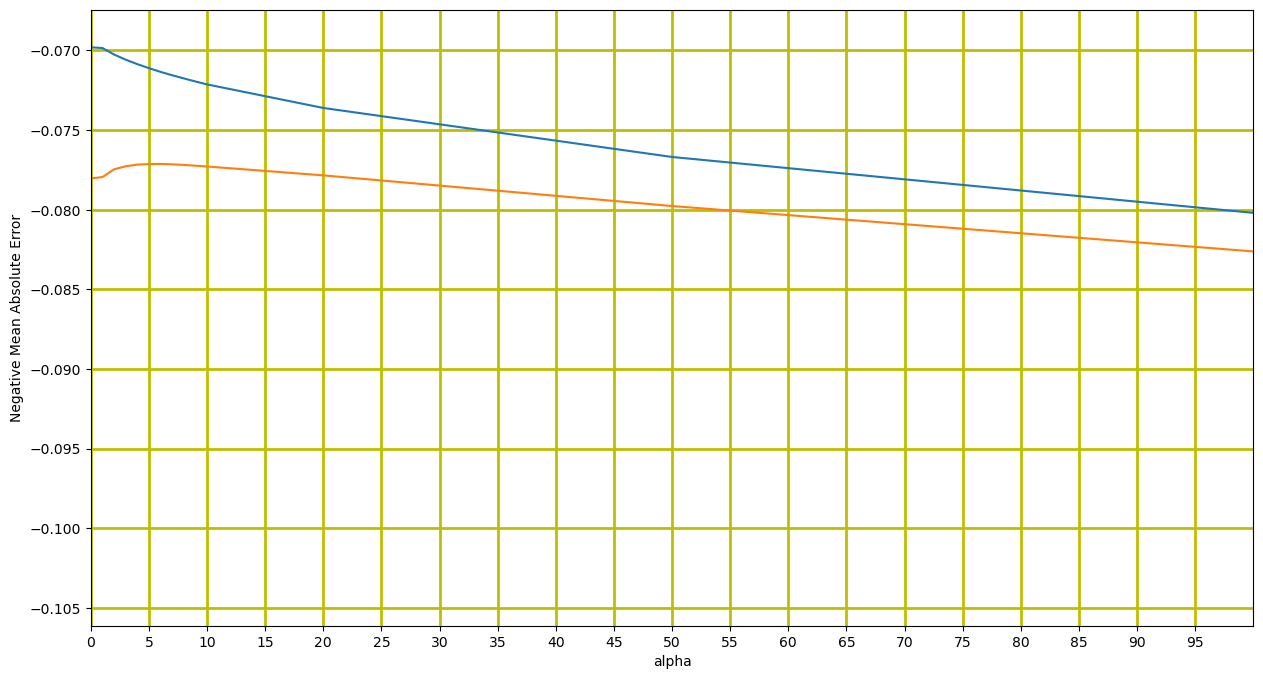

In [95]:
# Plotting the mean test and train scores
plt.figure(figsize=(15, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='y', linestyle='-', linewidth=2)
plt.show()

In [96]:
# Setting alpha as 5.0, building a ridge regression model
alpha = 5.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=5.0)

In [97]:
#getting the ridge coeff
ridge_coef = ridge.coef_
ridge_coef

array([[-0.04636107, -0.04356996,  0.11297247,  0.04594474,  0.01605917,
        -0.09020316, -0.04737102, -0.00572249, -0.02980275, -0.00637828,
         0.01493833,  0.03446324, -0.00749804, -0.02837098,  0.01194722,
        -0.02919064,  0.08905738, -0.01516044, -0.01111215, -0.00664595,
        -0.00262025,  0.02865121,  0.01507643,  0.02525783, -0.03344265,
        -0.01997791, -0.02346909,  0.01164479,  0.00938055, -0.03574372,
        -0.01101605, -0.01516044,  0.01645928,  0.00851375, -0.00647167,
         0.02424624,  0.01979244,  0.01173089,  0.0219083 ,  0.02138965,
         0.01662637, -0.00158892,  0.04220976, -0.05775331,  0.03051383,
        -0.01497028,  0.01304624, -0.03982078,  0.02464596, -0.01611607,
         0.01824466,  0.09792788, -0.05427682,  0.01678107, -0.02391573,
        -0.03651639, -0.02510777,  0.03882394, -0.02391573, -0.01960367,
         0.02980323,  0.05042906, -0.02671423, -0.02391573, -0.02391573,
         0.00527345,  0.0039789 , -0.00858299,  0.0

In [98]:
# predticting on X_train
y_train_pred_ridge = ridge.predict(X_train)

# checking the r2_score
r2_score(y_train, y_train_pred_ridge)

0.7337785682310826

In [99]:
# predicting on the X_test
y_test_pred_ridge = ridge.predict(X_test)

# checking the r2_score
r2_score(y_test, y_test_pred_ridge)

0.69175398847964

In [100]:
#Displaing the co-efficients of the model
ridge_coeff = pd.DataFrame(np.atleast_2d(ridge_coef),columns=X_train.columns)
ridge_coeff = ridge_coeff.T
ridge_coeff.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff.head(20)

Ridge Co-Efficient
HouseStyle_2.5Fin               0.112972
BsmtQual_Ex                     0.097928
KitchenQual_Ex                  0.093552
Exterior1st_BrkFace             0.089057
SaleCondition_Alloca            0.064779
BsmtExposure_Gd                 0.050429
GarageType_Attchd               0.046098
HouseStyle_2.5Unf               0.045945
GarageType_BuiltIn              0.045348
HeatingQC_Ex                    0.043097
ExterQual_Ex                    0.042210
BsmtCond_Gd                     0.038824
RoofStyle_Mansard               0.034463
ExterQual_Gd                    0.030514
BsmtCond_TA                     0.029803
GarageType_2Types               0.029546
Exterior1st_Plywood             0.028651
SaleType_ConLD                  0.026337
Exterior1st_Stucco              0.025258
ExterCond_Gd                    0.024646

**The top 20 properties impacting the price of the property**

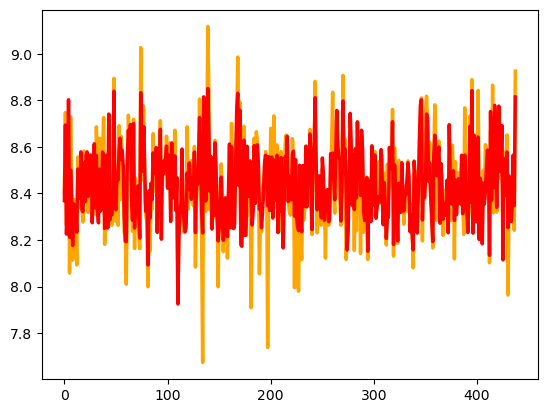

In [101]:
# plotting y_test v/s y_test_pred_ridge
ind = [i for i in range(0, y_test.shape[0], 1)]
plt.plot(ind, y_test, color='orange', linewidth=2.5, linestyle='-')
plt.plot(ind, y_test_pred_ridge, color='red', linewidth=2.5, linestyle='-')
plt.show()

## 8. Building Model using Lasso

In [102]:
params = {'alpha': [0.00001,0.00009,0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                    0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [103]:
#building lasso model using cross validation technique
lasso = Lasso()

model_cv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 9e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [104]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.029183  2.840051e-03         0.002727    5.050082e-04     0.00001   
1        0.008479  5.602187e-04         0.002334    7.842349e-04     0.00009   
2        0.008630  6.404289e-04         0.002795    3.944677e-04      0.0001   
3        0.005941  1.324126e-03         0.002858    2.504033e-04       0.001   
4        0.003007  6.196402e-04         0.001810    4.069328e-04        0.01   
5        0.002688  5.768921e-04         0.001501    4.397644e-04        0.05   
6        0.003209  7.677441e-04         0.001595    4.879757e-04         0.1   
7        0.003471  4.606848e-04         0.001830    4.107992e-04         0.2   
8        0.002993  6.336218e-04         0.001197    3.989954e-04         0.3   
9        0.003081  6.596498e-04         0.001651    8.716510e-04         0.4   
10       0.003082  7.649340e-04         0.001418    4.795283e-04         0.5   
11       0.002592  4.878577e-04         0.001580    5.559748e-04         0.6   
12       0.002993  4.109108e-06         0.002125    7.387410e-04         0.7   
13       0.002791  7.457795e-04         0.001794    3.983021e-04         0.8   
14       0.002990  8.869684e-07         0.001896    1.977006e-04         0.9   
15       0.002897  1.847527e-04         0.001235    4.758361e-04         1.0   
16       0.002635  7.724996e-04         0.001402    4.930237e-04         2.0   
17       0.003378  3.674403e-04         0.002087    5.846086e-04         3.0   
18       0.003389  4.890261e-04         0.001993    1.784161e-07         4.0   
19       0.003682  5.718810e-04         0.001795    3.978834e-04         5.0   
20       0.003090  6.620427e-04         0.001595    4.877992e-04         6.0   
21       0.002790  3.987791e-04         0.001595    4.881883e-04         7.0   
22       0.003189  3.988744e-04         0.001196    3.985406e-04         8.0   
23       0.002692  3.983074e-04         0.001595    4.883251e-04         9.0   
24       0.002616  5.108679e-04         0.001595    4.879937e-04        10.0   
25       0.003389  4.883247e-04         0.001794    3.988028e-04          20   
26       0.003091  6.628196e-04         0.001859    4.487351e-04          50   
27       0.002891  7.096715e-04         0.001694    5.871174e-04         100   
28       0.002791  3.988267e-04         0.001795    3.989476e-04         500   
29       0.003388  4.875669e-04         0.001526    4.823484e-04        1000   

               params  split0_test_score  split1_test_score  \
0    {'alpha': 1e-05}          -0.078688          -0.077726   
1    {'alpha': 9e-05}          -0.077468          -0.077531   
2   {'alpha': 0.0001}          -0.077381          -0.077511   
3    {'alpha': 0.001}          -0.075407          -0.077611   
4     {'alpha': 0.01}          -0.097552          -0.097613   
5     {'alpha': 0.05}          -0.141705          -0.141515   
6      {'alpha': 0.1}          -0.144175          -0.144182   
7      {'alpha': 0.2}          -0.144175          -0.144182   
8      {'alpha': 0.3}          -0.144175          -0.144182   
9      {'alpha': 0.4}          -0.144175          -0.144182   
10     {'alpha': 0.5}          -0.144175          -0.144182   
11     {'alpha': 0.6}          -0.144175          -0.144182   
12     {'alpha': 0.7}          -0.144175          -0.144182   
13     {'alpha': 0.8}          -0.144175          -0.144182   
14     {'alpha': 0.9}          -0.144175          -0.144182   
15     {'alpha': 1.0}          -0.144175          -0.144182   
16     {'alpha': 2.0}          -0.144175          -0.144182   
17     {'alpha': 3.0}          -0.144175          -0.144182   
18     {'alpha': 4.0}          -0.144175          -0.144182   
19     {'alpha': 5.0}          -0.144175          -0.144182   
20     {'alpha': 6.0}          -0.144175          -0.144182   
21     {'alpha': 7.0}          -0.144175          -0.144182   
22     {'alpha': 8.0}          -0.144175          -0.144182   
23     {'al

In [105]:
model_cv.best_params_

{'alpha': 0.0001}

In [106]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int64')

In [107]:
cv_results['mean_train_score']

0    -0.069300
1    -0.070218
2    -0.070346
3    -0.074796
4    -0.095777
5    -0.141537
6    -0.143847
7    -0.143847
8    -0.143847
9    -0.143847
10   -0.143847
11   -0.143847
12   -0.143847
13   -0.143847
14   -0.143847
15   -0.143847
16   -0.143847
17   -0.143847
18   -0.143847
19   -0.143847
20   -0.143847
21   -0.143847
22   -0.143847
23   -0.143847
24   -0.143847
25   -0.143847
26   -0.143847
27   -0.143847
28   -0.143847
29   -0.143847
Name: mean_train_score, dtype: float64

In [108]:
cv_results['mean_test_score']

0    -0.079453
1    -0.077899
2    -0.077857
3    -0.079202
4    -0.096580
5    -0.141817
6    -0.144037
7    -0.144037
8    -0.144037
9    -0.144037
10   -0.144037
11   -0.144037
12   -0.144037
13   -0.144037
14   -0.144037
15   -0.144037
16   -0.144037
17   -0.144037
18   -0.144037
19   -0.144037
20   -0.144037
21   -0.144037
22   -0.144037
23   -0.144037
24   -0.144037
25   -0.144037
26   -0.144037
27   -0.144037
28   -0.144037
29   -0.144037
Name: mean_test_score, dtype: float64

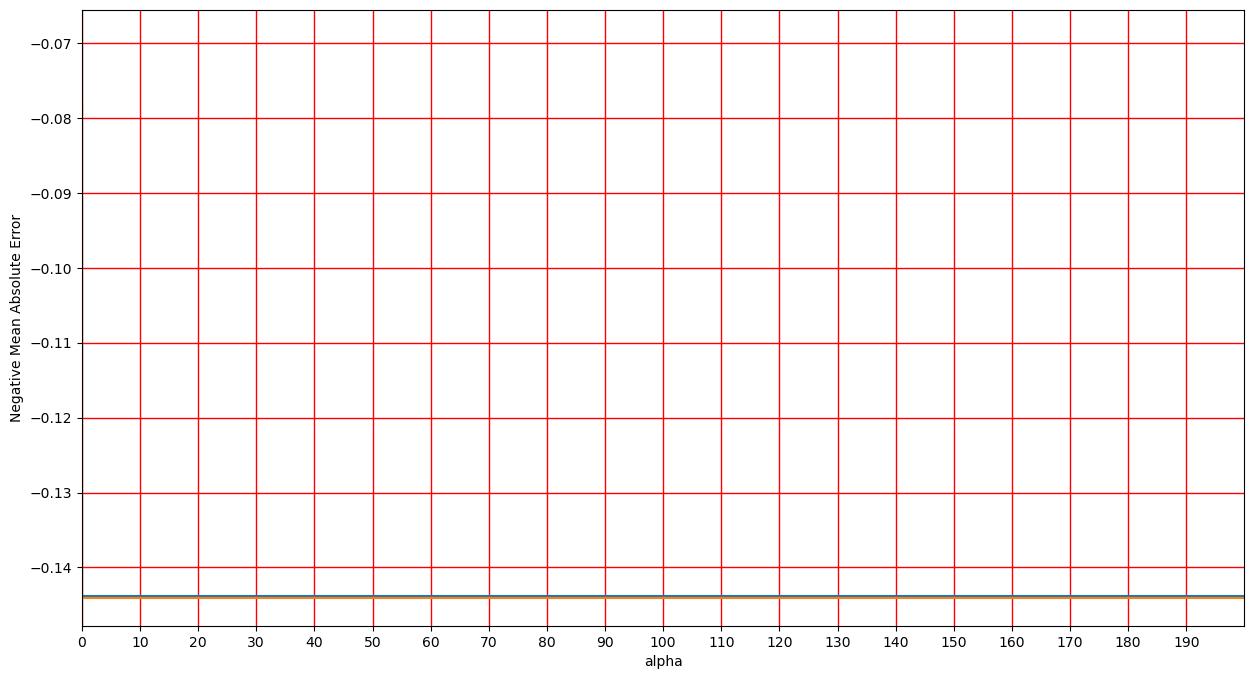

In [109]:
# Plotting the mean test and train scores
plt.figure(figsize=(15, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [110]:
# Setting alpha as 0.0001, building a lasso regression model
alpha = 0.00001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=1e-05)

In [111]:
# predticting on X_train
y_train_pred_lasso = ridge.predict(X_train)

# checking the r2_score
r2_score(y_train, y_train_pred_lasso)

0.7337785682310826

In [112]:
# predicting on X_test
y_test_pred_lasso = lasso.predict(X_test)

# checking the r2_score
r2_score(y_test, y_test_pred_lasso)

0.6801017638986833

In [113]:
# checking the parameters of the Lasso Regression model
model_params_lasso = list(lasso.coef_)
model_params_lasso.insert(0, lasso.intercept_)

In [114]:
model_params_lasso = [np.round(x, 3) for x in model_params_lasso]
cols = X.columns
cols = cols.insert(0, 'constant')
lasso_selected_features = []
for k, v in sorted(list(zip(model_params_lasso, cols)), key=lambda x:abs(x[0]), reverse=True)[1:131]:
    lasso_selected_features.append(v)
sorted(list(zip(model_params_lasso, cols)), key=lambda x: abs(x[0]), reverse=True)

[(array([8.249]), 'constant'),
 (0.274, 'LotConfig_Inside'),
 (0.198, 'OverallCond'),
 (0.174, 'LandContour_Bnk'),
 (0.153, 'Neighborhood_BrkSide'),
 (0.145, 'Neighborhood_NoRidge'),
 (0.14, 'HouseStyle_1Story'),
 (0.135, 'Exterior1st_VinylSd'),
 (-0.124, 'RoofStyle_Mansard'),
 (-0.121, 'BsmtFinSF2'),
 (0.12, 'MSZoning_RM'),
 (0.119, 'LotConfig_FR2'),
 (0.118, 'Exterior1st_MetalSd'),
 (0.116, 'Neighborhood_BrDale'),
 (0.114, 'EnclosedPorch'),
 (-0.113, 'HouseStyle_1.5Fin'),
 (0.112, 'LotConfig_CulDSac'),
 (0.111, 'Neighborhood_Blmngtn'),
 (0.11, 'Neighborhood_ClearCr'),
 (0.104, 'LandContour_HLS'),
 (-0.098, 'GarageArea'),
 (-0.097, 'Neighborhood_NPkVill'),
 (0.096, 'Neighborhood_CollgCr'),
 (0.092, 'Fireplaces'),
 (0.092, 'HouseStyle_SFoyer'),
 (0.086, 'LotConfig_FR3'),
 (-0.082, 'Exterior1st_HdBoard'),
 (0.078, 'MasVnrArea'),
 (0.077, 'Neighborhood_Blueste'),
 (0.076, 'MSZoning_C (all)'),
 (0.072, 'WoodDeckSF'),
 (0.072, 'Neighborhood_Somerst'),
 (-0.072, 'RoofStyle_Gambrel'),
 (-0.0

In [115]:
#enhancing the lasso coeff to get values in better format
lasso_coef = lasso.coef_
lasso_coeff = pd.DataFrame(np.atleast_2d(lasso_coef),columns=X_train.columns)
lasso_coeff = lasso_coeff.T
lasso_coeff.rename(columns={0: 'Lasso Doubled Alpha Co-Efficient'},inplace=True)
lasso_coeff.sort_values(by=['Lasso Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_coeff.head(20)

The most important predictor variables are as follows:


Lasso Doubled Alpha Co-Efficient
Exterior2nd_Other                             0.273842
HouseStyle_2.5Fin                             0.197857
Exterior2nd_AsbShng                           0.174360
Exterior2nd_VinylSd                           0.153124
BsmtQual_Ex                                   0.145343
KitchenQual_Ex                                0.139772
SaleCondition_Alloca                          0.135123
Exterior1st_Stone                             0.120064
Exterior2nd_ImStucc                           0.118756
SaleType_Oth                                  0.118218
Exterior2nd_Stucco                            0.116369
Exterior1st_BrkFace                           0.113905
Exterior2nd_HdBoard                           0.111962
Exterior2nd_Plywood                           0.111115
Exterior2nd_Wd Sdng                           0.110454
Exterior2nd_AsphShn                           0.103861
Exterior2nd_Wd Shng                           0.095778
GarageType_2Types                             0.092092
RoofStyle_Mansard                             0.091853
Exterior2nd_MetalSd                           0.085775

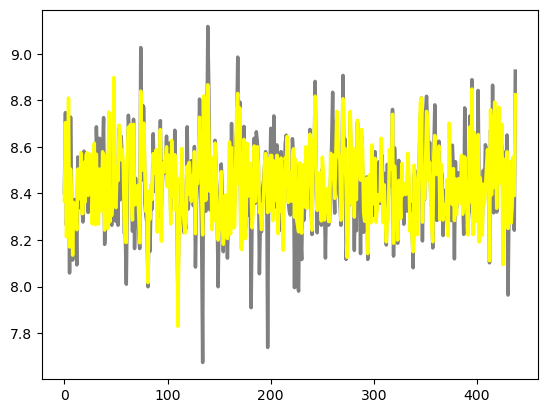

In [116]:
# Plotting y_test v/s y_test_pred_lasso
ind = [i for i in range(0, y_test.shape[0], 1)]
plt.plot(ind, y_test, color='grey', linewidth=2.5, linestyle='-')
plt.plot(ind, y_test_pred_lasso, color='yellow', linewidth=2.5, linestyle='-')
plt.show()

## 9. Inferences

#### 1. The scatter plots of numerical variables against Salesprice showed most of the variables have some linear relationship with Salesprice.
#### 2. Linear regression model was built after handling all null values from the data, removing highly multi-colinear and non -variant independent variables. It was found that both with LinearRegression Model and RFE selection ,model is overfitting on training data. 
#### 3. We then performed Ridge regression . Optimum alpha found was 5. R-sqaured value on test data came out to be 0.8137 . (Training R-squared = 0.86)
#### 4. We then performed Lasso regression . Optimum alpha found was 0.00001. R-sqaured value on test data came out to be 0.81334 . (Training R-squared = 0.8678)
#### 5. Below are the variables found to be significant in predicting the price of a house :- 

1. Neighbourhood
2. KitchenQuality
3. BsmtQual
4. Basement rating/Exposure
5. LotConfig
6. TotRmsAbvGrd
7. MSZoning
8. Fireplaces